# 0. Contexto

Datos de la empresa:
* Empresa con nivel de aceptación de la campaña de marketing = 14,91%.
  
* La dirección considera insuficiente un nivel de aceptación del 14,91% para hacer frente a la competencia.
  
* La dirección quiere:
    * Aumentaran el nivel de aceptación de la campaña de márketing. 
    * Los costes en los de la empresa al realizar campañas de marketing serían más eficientes
    * Aumentaría la cantidad de ingresos que obtienen en los años siguientes.





* El equipo de marketing quiere: 
    * El equipo de CD procese los datos históricos de ventas que han recabado previamente.
    * Agrupar a los usuarios en una categoría determinada según sus características respectivas.
    * Así, poder distinguir entre los que merecen campañas y los que no las reciben.

### Meta

AUMENTAR TASA DE RESPUESTA DE CAMPAÑA DE MARKETING -> para -> AUMENTAR BENEFICIO DE LA EMPRESA

### Objetivos

* Crear un sistema de predicción de modelos de clasificación/clusterización que pueda determinar el usuario objetivo adecuado. 
* Con el usuario/objetivo adecuado aumentará el valor de las métricas empresariales predeterminadas (tráfico, el rendimiento de las ventas, etc).
* El sistema determinará qué usuarios están actualmente interesados o forman parte del mercado de la campaña que se va a realizar.

### Metricas de interés

* Tasa de respuesta
* Tasa de ingresos (BENEFICIO DE LA EMPRESA)

# 1. Data Analysis

### Variables

* ID: Código del cliente
  
* Year_Birth: Edad del cliente
  
* Education: Nivel de educación del cliente
  
* Marital_Status: Estado civil
  
* Income: Ingresos anuales del cliente
  
* Kidhome: número de hijos menores de 13 años en el hogar del cliente
  
* Teenhome: número de hijos entre 13 y 19 años en el hogar del cliente
  
* Dt_Customer: Fecha de entrada del cliente
  
* Recency: número de días desde la última compra
  
* MntWines: Importe en dólares de los vinos comprados en los 2 últimos años
  
* MntFruits: Importe en dólares de fruta comprada en los 2 últimos años
  
* MntMeatProducts: Importe en dólares de carne comprada en los 2 últimos años
  
* MntFishProducts: Importe en dólares de pescado comprado en los 2 últimos años
  
* MntSweetProducts: Importe en dólares de dulces comprados en los 2 últimos años
  
* MntGoldProds: Importe en dólares de productos de oro comprados en los 2 últimos años
  
* NumDealsPurchases: Nº de compras realizadas con descuento
  
* NumWebPurchases: Nº de compras realizadas a través de la web
  
* NumCatalogPurchases: Nº de compras realizadas con el catálogo
  
* NumStorePurchases: Nº de compras realizadas en la tienda
  
* NumWebVisitsMonth: Nº de visitas a la página web en 1 mes
* 
* AcceptedCmp1: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario
  
* AcceptedCmp2: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario
  
* AcceptedCmp3: 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario
  
* AcceptedCmp4: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario
  
* AcceptedCmp5: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario.
  
* Queja: 1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario
  
* Respuesta: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario
  
* Z_Coste
  
* Z_Ingresos

### 1.1. Exploratory Data Analysis

In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/marketing_campaign.csv', sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
# Check Missing Value 
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Solo 1 variable con datos nulos (salario). ¿A qué puede ser debido?

In [4]:
# Handling Missing Value, in case < 10% 
df = df.dropna()

In [5]:
# Check Duplicate 
df.duplicated().sum()

0

In [6]:
# Check Value for each Columns -- Check Invalid Data 
for x in df.columns.to_list() : 
  print(x + '=')
  print(df[x].sort_values().unique())
  print('')

ID=
[    0     1     9 ... 11187 11188 11191]

Year_Birth=
[1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]

Education=
['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']

Marital_Status=
['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']

Income=
[  1730.   2447.   3502. ... 160803. 162397. 666666.]

Kidhome=
[0 1 2]

Teenhome=
[0 1 2]

Dt_Customer=
['2012-07-30' '2012-07-31' '2012-08-01' '2012-08-02' '2012-08-03'
 '2012-08-04' '2012-08-05' '2012-08-06' '2012-08-07' '2012-08-08'
 '2012-08-09' '2012-08-10' '2012-08-11' '2012-08-12' '2012-08-13'
 '2012-08-14' '2012-08-15' '2012-08-16' '2012-08-17' '2012-08-18'
 '2012-08-19' '2012-08-20' '2012-08-21' '2012-08-22' '2012-08-23'
 '2012-08-24' '2012-08-25' '2012-08-26' '20

In [7]:
# Cambio de datos en algunas columnas
df['Kidhome'] = df['Kidhome'].replace({0 : "no kid", 1: "1 kid", 2: "2 kids"})
df['Teenhome'] = df['Teenhome'].replace({0 : "no teen", 1: "1 teen", 2: "2 teens"})
df['AcceptedCmp1'] = df['AcceptedCmp1'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp2'] = df['AcceptedCmp2'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp3'] = df['AcceptedCmp3'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp4'] = df['AcceptedCmp4'].replace({0 : "didn't accept", 1: "accepted"})
df['AcceptedCmp5'] = df['AcceptedCmp5'].replace({0 : "didn't accept", 1: "accepted"})
df['Complain'] = df['Complain'].replace({0 : "no complain", 1: "complained"})
df['Response'] = df['Response'].replace({0 : "no respond", 1: "responded"})

In [8]:
# Separamos las columnas en categóricas y numéricas
cats = ["Education",
        "Marital_Status",
        "Kidhome",
        "Teenhome",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "Complain",
        "Response"]
num = ['ID',
       'Year_Birth',
       'Income',
       'Recency',
       'MntWines',
       'MntFruits',
       'MntMeatProducts',
       'MntFishProducts', 
       'MntSweetProducts',
       'MntGoldProds',
       'NumDealsPurchases',
       'NumWebPurchases',
       'NumCatalogPurchases',
       'NumStorePurchases',
       'NumWebVisitsMonth']

In [9]:
df[num].describe()

ID   Year_Birth         Income      Recency     MntWines  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354    49.012635   305.091606   
std     3249.376275    11.985554   25173.076661    28.948352   337.327920   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000    24.000000    24.000000   
50%     5458.500000  1970.000000   51381.500000    49.000000   174.500000   
75%     8421.750000  1977.000000   68522.000000    74.000000   505.000000   
max    11191.000000  1996.000000  666666.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2216.000000        2216.000000      2216.000000          2216.000000   
mean      43.965253           2.323556         4.085289             2.671029   
std       51.815414           1.923716         2.740951             2.926734   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.500000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      321.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  
count        2216.000000        2216.000000  
mean            5.800993           5.319043  
std             3.250785           2.425359  
min             0.000000           0.000000  
25%             3.000000           3.000000  
50%             5.000000           6.000000  
75%             8.000000           7.000000  
max            13.000000          20.000000

In [10]:
df[cats].describe()

Education Marital_Status Kidhome Teenhome   AcceptedCmp3  \
count         2216           2216    2216     2216           2216   
unique           5              8       3        3              2   
top     Graduation        Married  no kid  no teen  didn't accept   
freq          1116            857    1283     1147           2053   

         AcceptedCmp4   AcceptedCmp5   AcceptedCmp1   AcceptedCmp2  \
count            2216           2216           2216           2216   
unique              2              2              2              2   
top     didn't accept  didn't accept  didn't accept  didn't accept   
freq             2052           2054           2074           2186   

           Complain    Response  
count          2216        2216  
unique            2           2  
top     no complain  no respond  
freq           2195        1883

In [11]:
# check variables: education y marital status
df[['Education', 'Marital_Status']].value_counts()
# there are some questionable data such as "Alone", "Absurd", "Yolo", "2nd cycle", "Master"

Education   Marital_Status
Graduation  Married           429
            Together          285
            Single            246
PhD         Married           190
Master      Married           138
Graduation  Divorced          119
PhD         Together          116
Master      Together          102
PhD         Single             96
2n Cycle    Married            80
Master      Single             75
2n Cycle    Together           56
PhD         Divorced           52
Master      Divorced           37
2n Cycle    Single             36
Graduation  Widow              35
PhD         Widow              24
2n Cycle    Divorced           23
Basic       Married            20
            Single             18
            Together           14
Master      Widow              11
2n Cycle    Widow               5
PhD         YOLO                2
Master      Alone               1
            Absurd              1
Graduation  Alone               1
            Absurd              1
Basic       Widow    

QUESTION:

¿Hay columnas con tipos de datos inadecuados, o nombres de columnas y contenidos que no coinciden?

*El tipo de datos erróneo sólo se encuentra en "Dt_Customer", donde los datos deberían tener un tipo de fecha en lugar de un objeto para los nombres de columna y los contenidos no se han considerado más profundamente*

QUESTION:

¿Alguna de las columnas tiene valores en blanco? En caso afirmativo, ¿cuáles son?


*Sí, la columna de Income*

QUESTION:

¿Hay alguna columna que tenga un valor de resumen ligeramente extraño? (mínimo/medio/mediano/máximo/único/superior/frecuencia)

*Sí, en las secciones Educación y Estado_marital (demasiadas categorías)*

# 2. Análisis Univariado

Pasos del análisis univeriante:

* Visualizar la distribución de cada columna (características y objetivos) mediante plots

* Anotar los resultados de las observaciones, por ejemplo, si hay una columna con una distribución interesante (por ejemplo, sesgada, bimodal, hay valores atípicos, hay valores dominantes, hay demasiadas categorías, etc.). 

### 2.1. Visualización

In [13]:
cats = ['Education', 'Marital_Status']
nums_cats = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
nums_1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines'] 
nums_2 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases'] 
nums_3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
timestamp = ['Dt_Customer']

In [14]:
#Menampilkan jumlah value per kategori
for col in cats:
    print(f'value count {col} column:')
    print(df[col].value_counts())

value count Education column:
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
value count Marital_Status column:
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


El siguiente bloque de código analiza la distribución de frecuencia de las variables y permite ver cómo están distribuidas

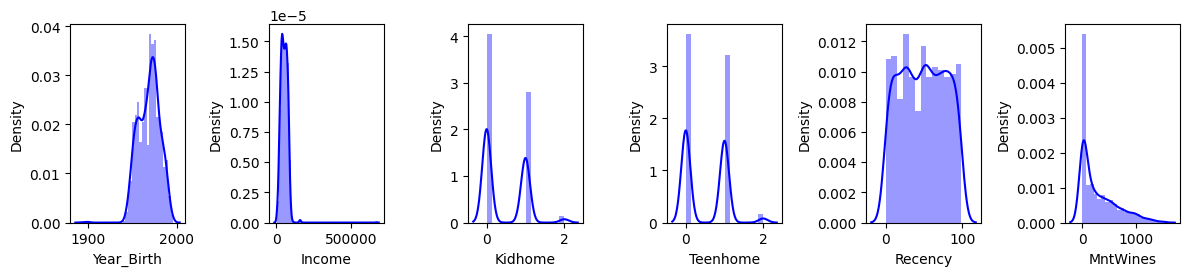

In [15]:
df = pd.read_csv('data/marketing_campaign.csv', delimiter = ';')
df = df.dropna()
cats = ['Education', 'Marital_Status']
nums_cats = ['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
nums_1 = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines'] 
nums_2 = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases'] 
nums_3 = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
timestamp = ['Dt_Customer']

plt.figure(figsize=(12,5))
for i in range(0, len(nums_1)):
    plt.subplot(2, len(nums_1), i+1)
    sns.distplot(df[nums_1[i]], color='blue')
    plt.tight_layout()

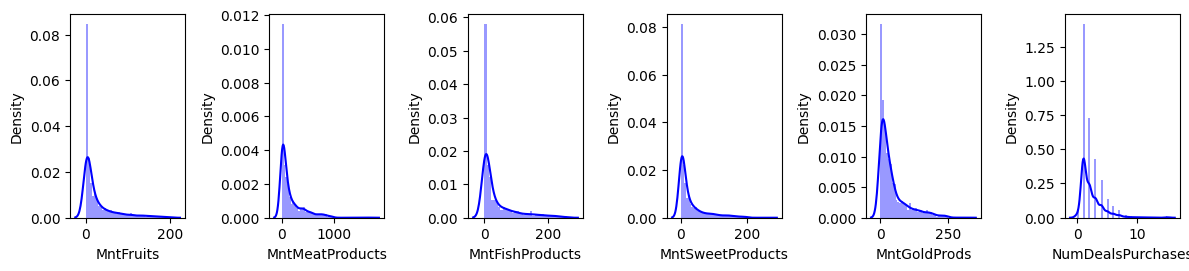

In [16]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_2)):
    plt.subplot(2, len(nums_2), i+1)
    sns.distplot(df[nums_2[i]], color='blue')
    plt.tight_layout()

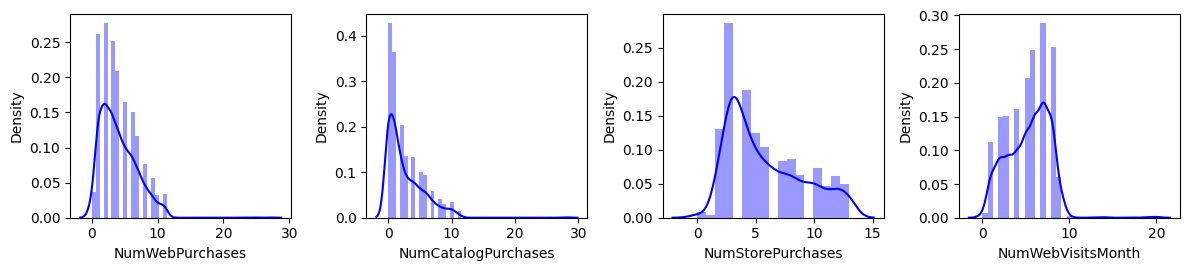

In [17]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_3)):
    plt.subplot(2, len(nums_3), i+1)
    sns.distplot(df[nums_3[i]], color='blue')
    plt.tight_layout()

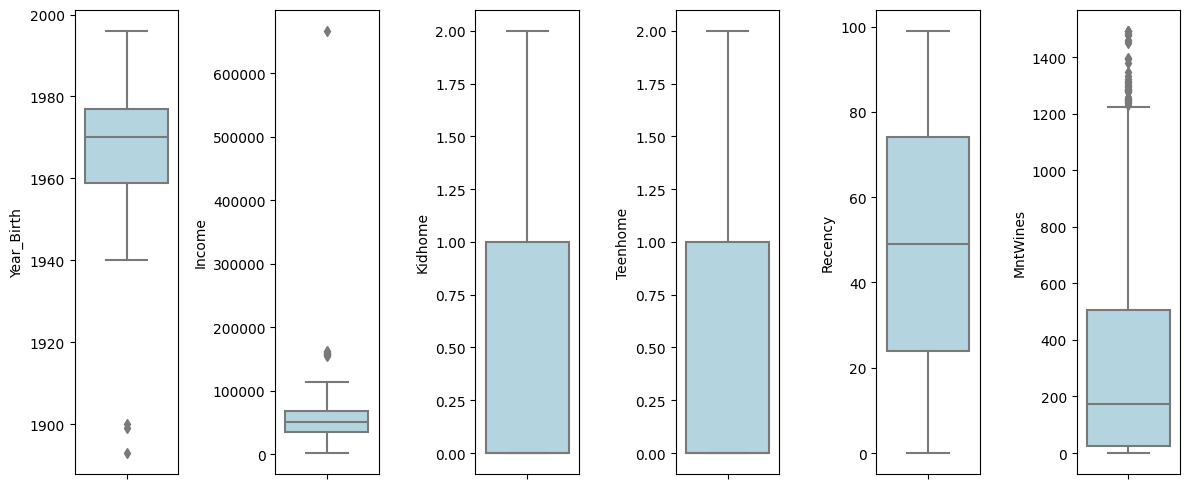

In [18]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_1)):
    plt.subplot(1, len(nums_1), i+1)
    sns.boxplot(y=df[nums_1[i]], color='lightblue', orient='v')
    plt.tight_layout()

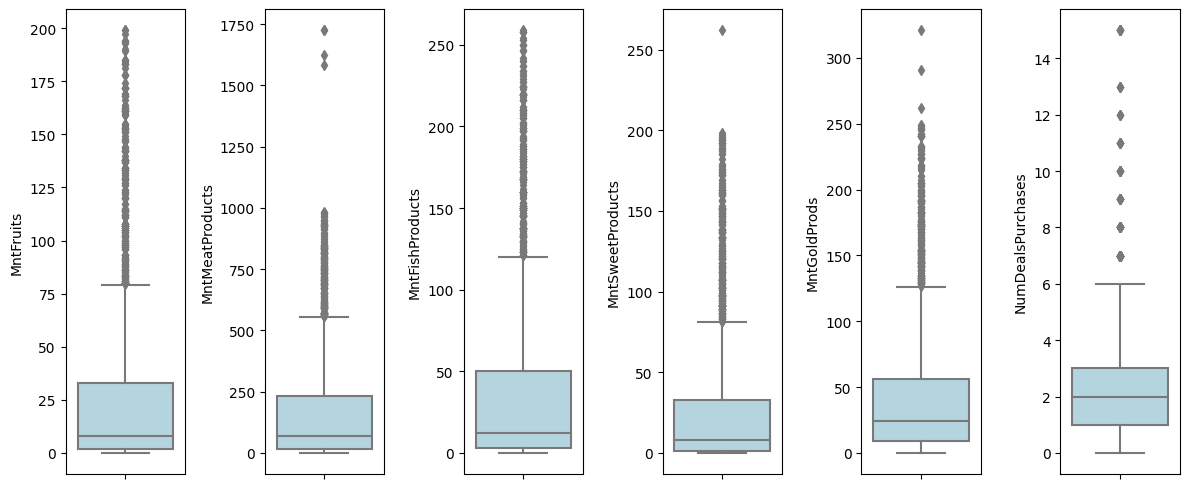

In [19]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_2)):
    plt.subplot(1, len(nums_2), i+1)
    sns.boxplot(y=df[nums_2[i]], color='lightblue', orient='v')
    plt.tight_layout()

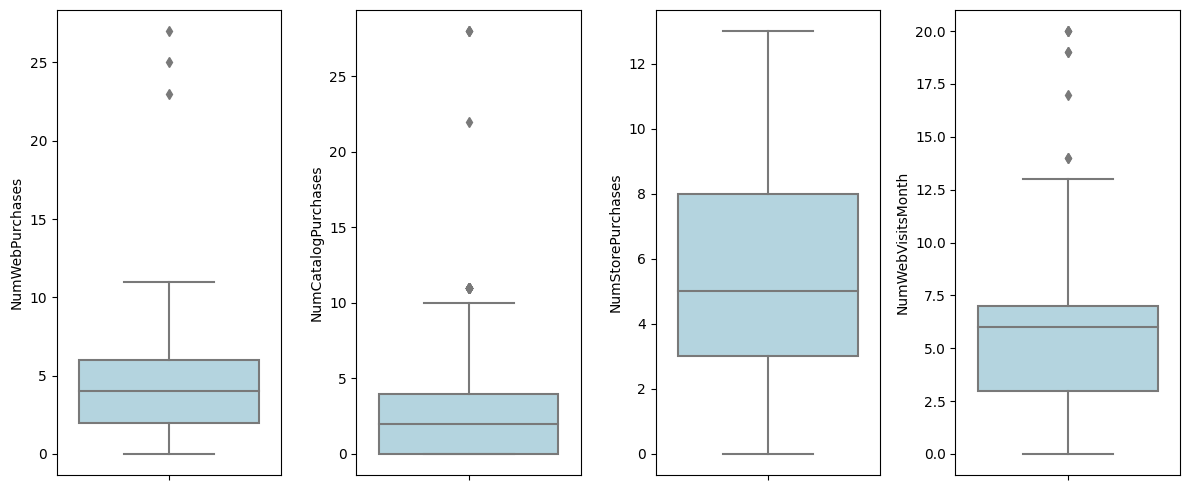

In [20]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_3)):
    plt.subplot(1, len(nums_3), i+1)
    sns.boxplot(y=df[nums_3[i]], color='lightblue', orient='v')
    plt.tight_layout()

In [4]:
# Categorical feature
plt.figure(figsize=(12,5))
for i in range(0, len(cats)): 
  plt.subplot(1, len(cats), i+1)
  sns.countplot( x = df[cats[i]], color='orange')
  plt.tight_layout()

NameError: name 'cats' is not defined

<Figure size 1200x500 with 0 Axes>

In [2]:
sns.countplot( x = df['Response'], color='orange')
plt.tight_layout()

NameError: name 'sns' is not defined

### 2.2. Resultados del análisis univariante

**Resultados con variables categóricas**

- Education y Marital_Status tienen muchas variables.
- Education y Marital_Status deberían reducirse para tener menos categorías en cada una.


**Resultados con variables numéricas**

- Distribuciones observadas:
    - Year_Birth >> Negative Skew
    - Income >> Positive Skew
    - Kidhome >> Bimodal
    - Teenhome >> Bimodal
    - Recency >> Uniform
    - MntWines >> Positive Skew
    - MntFruits >> Positive Skew
    - MntMeatProducts >> Positive Skew
    - MntFishProducts >> Positive Skew
    - MntSweetProducts >> Positive Skew
    - MntGoldProds >> Positive Skew
    - NumDealsPurchases >> Positive Skew
    - NumWebPurchases >> Positive Skew
    - NumCatalogPurchases >> Positive Skew
    - NumStorePurchases >> Positive Skew
    - NumWebVisitsMonth >> Positive Skew

Variables con positive skew: aplicar log-transformation en el preprocesado.

Variables con negative skew: aplicar estandarización en el preprocesado.


**Outliers**

- Year_Birth
- Income
- Recency
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumWebVisitsMonth

En el proceso de preprocesamiento, las columnas que tienen outliers pueden eliminarse basándose en laz-score o utilizando IQR.

La columna "respuesta" está desbalanceada: muestra un desequilibrio de clases -> es necesario realizar un sobre/muestreo/ submuestreo durante el preprocesamiento.

There is an imbalance in the target column, namely the response column, indicating class imbalance, so it is necessary to do over/undersampling during preprocessing

# 3. Análisis Multivariado

### 3.1. Análisis de correlación

In [23]:
#find correlation between variables
df_for_corr =pd.read_csv('data/marketing_campaign.csv', delimiter=';')
df_for_corr.corr()

ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.013095  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.161791  0.230176 -0.352111   
Income               0.013095   -0.161791  1.000000 -0.428669  0.019133   
Kidhome              0.002406    0.230176 -0.428669  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.019133 -0.036133  1.000000   
Recency             -0.046524   -0.019871 -0.003970  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.578650 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.430842 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.584633 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.438871 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.440744 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.325916 -0.349595 -0.021725   
NumDealsPurchases   -0.037166   -0.060846 -0.083101  0.221798  0.387741   
NumWebPurchases     -0.018924   -0.145040  0.387878 -0.361647  0.155500   
NumCatalogPurchases -0.003440   -0.121275  0.589162 -0.502237 -0.110769   
NumStorePurchases   -0.014927   -0.128272  0.529362 -0.499683  0.050695   
NumWebVisitsMonth   -0.007446    0.121139 -0.553088  0.447846  0.134884   
AcceptedCmp3        -0.036040    0.061774 -0.016174  0.014674 -0.042677   
AcceptedCmp4        -0.025387   -0.060510  0.184400 -0.161600  0.038886   
AcceptedCmp5        -0.007517    0.007123  0.335943 -0.205634 -0.191050   
AcceptedCmp1        -0.021614   -0.005930  0.276820 -0.172339 -0.140090   
AcceptedCmp2        -0.015061   -0.006539  0.087545 -0.081716 -0.015605   
Complain             0.033883   -0.030128 -0.027225  0.040207  0.003138   
Z_CostContact             NaN         NaN       NaN       NaN       NaN   
Z_Revenue                 NaN         NaN       NaN       NaN       NaN   
Response            -0.021968    0.021325  0.133047 -0.080008 -0.154446   

                      Recency  MntWines  MntFruits  MntMeatProducts  \
ID                  -0.046524 -0.022878   0.004600        -0.004437   
Year_Birth          -0.019871 -0.157773  -0.017917        -0.030872   
Income              -0.003970  0.578650   0.430842         0.584633   
Kidhome              0.008827 -0.496297  -0.372581        -0.437129   
Teenhome             0.016198  0.004846  -0.176764        -0.261160   
Recency              1.000000  0.016064  -0.004306         0.023056   
MntWines             0.016064  1.000000   0.389637         0.562667   
MntFruits           -0.004306  0.389637   1.000000         0.543105   
MntMeatProducts      0.023056  0.562667   0.543105         1.000000   
MntFishProducts      0.001079  0.399753   0.594804         0.568402   
MntSweetProducts     0.022670  0.386581   0.567164         0.523846   
MntGoldProds         0.016693  0.387516   0.392995         0.350609   
NumDealsPurchases   -0.001098  0.010940  -0.132114        -0.122415   
NumWebPurchases     -0.010726  0.542265   0.296735         0.293761   
NumCatalogPurchases  0.025110  0.635226   0.487917         0.723827   
NumStorePurchases    0.000799  0.642100   0.461758         0.479659   
NumWebVisitsMonth   -0.021445 -0.320653  -0.418383        -0.539470   
AcceptedCmp3        -0.032991  0.062202   0.014727         0.018272   
AcceptedCmp4         0.018826  0.373286   0.010152         0.102912   
AcceptedCmp5         0.000129  0.472613   0.215833         0.373769   
AcceptedCmp1        -0.019283  0.354133   0.194748         0.309761   
AcceptedCmp2        -0.001781  0.205907  -0.009773         0.043033   
Complain             0.013231 -0.039007  -0.005166        -0.023483   
Z_CostContact             NaN       NaN        NaN              NaN   
Z_Revenue                 NaN       NaN        NaN              NaN   
Response            -0.198437  0.247254   0.125289         0.236335   

                     MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  \
ID   

In [24]:
list(set(list(df_for_corr["Z_CostContact"]))) # Variable con valor único
# El coste para todos los clientes es 3 por campaña de marketing que aceptan

[3]

In [25]:
list(set(list(df_for_corr["Z_Revenue"]))) # Variable con valor único
# El beneficio para todos los clientes es 11 por campaña de marketing que aceptan

[11]

In [26]:
# Eliminar columnas ID, Z_CostContact y Z_Revenue
df_for_corr = df_for_corr.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

<AxesSubplot: >

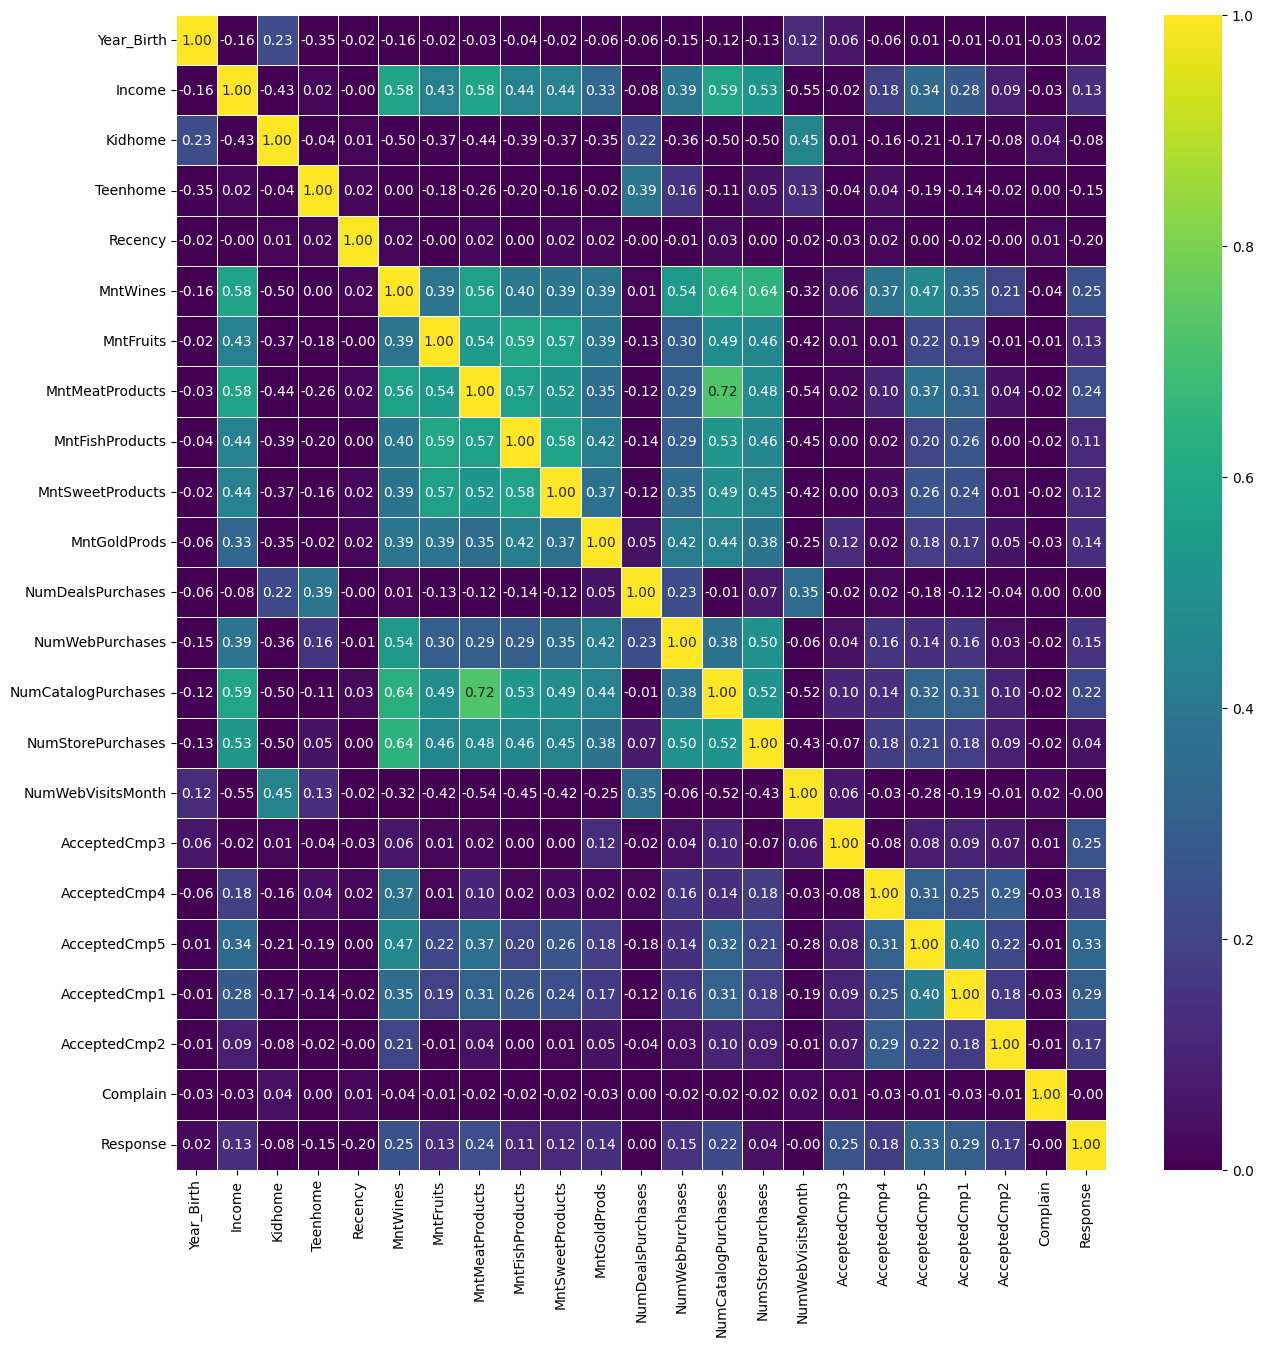

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')

<Figure size 1800x800 with 0 Axes>

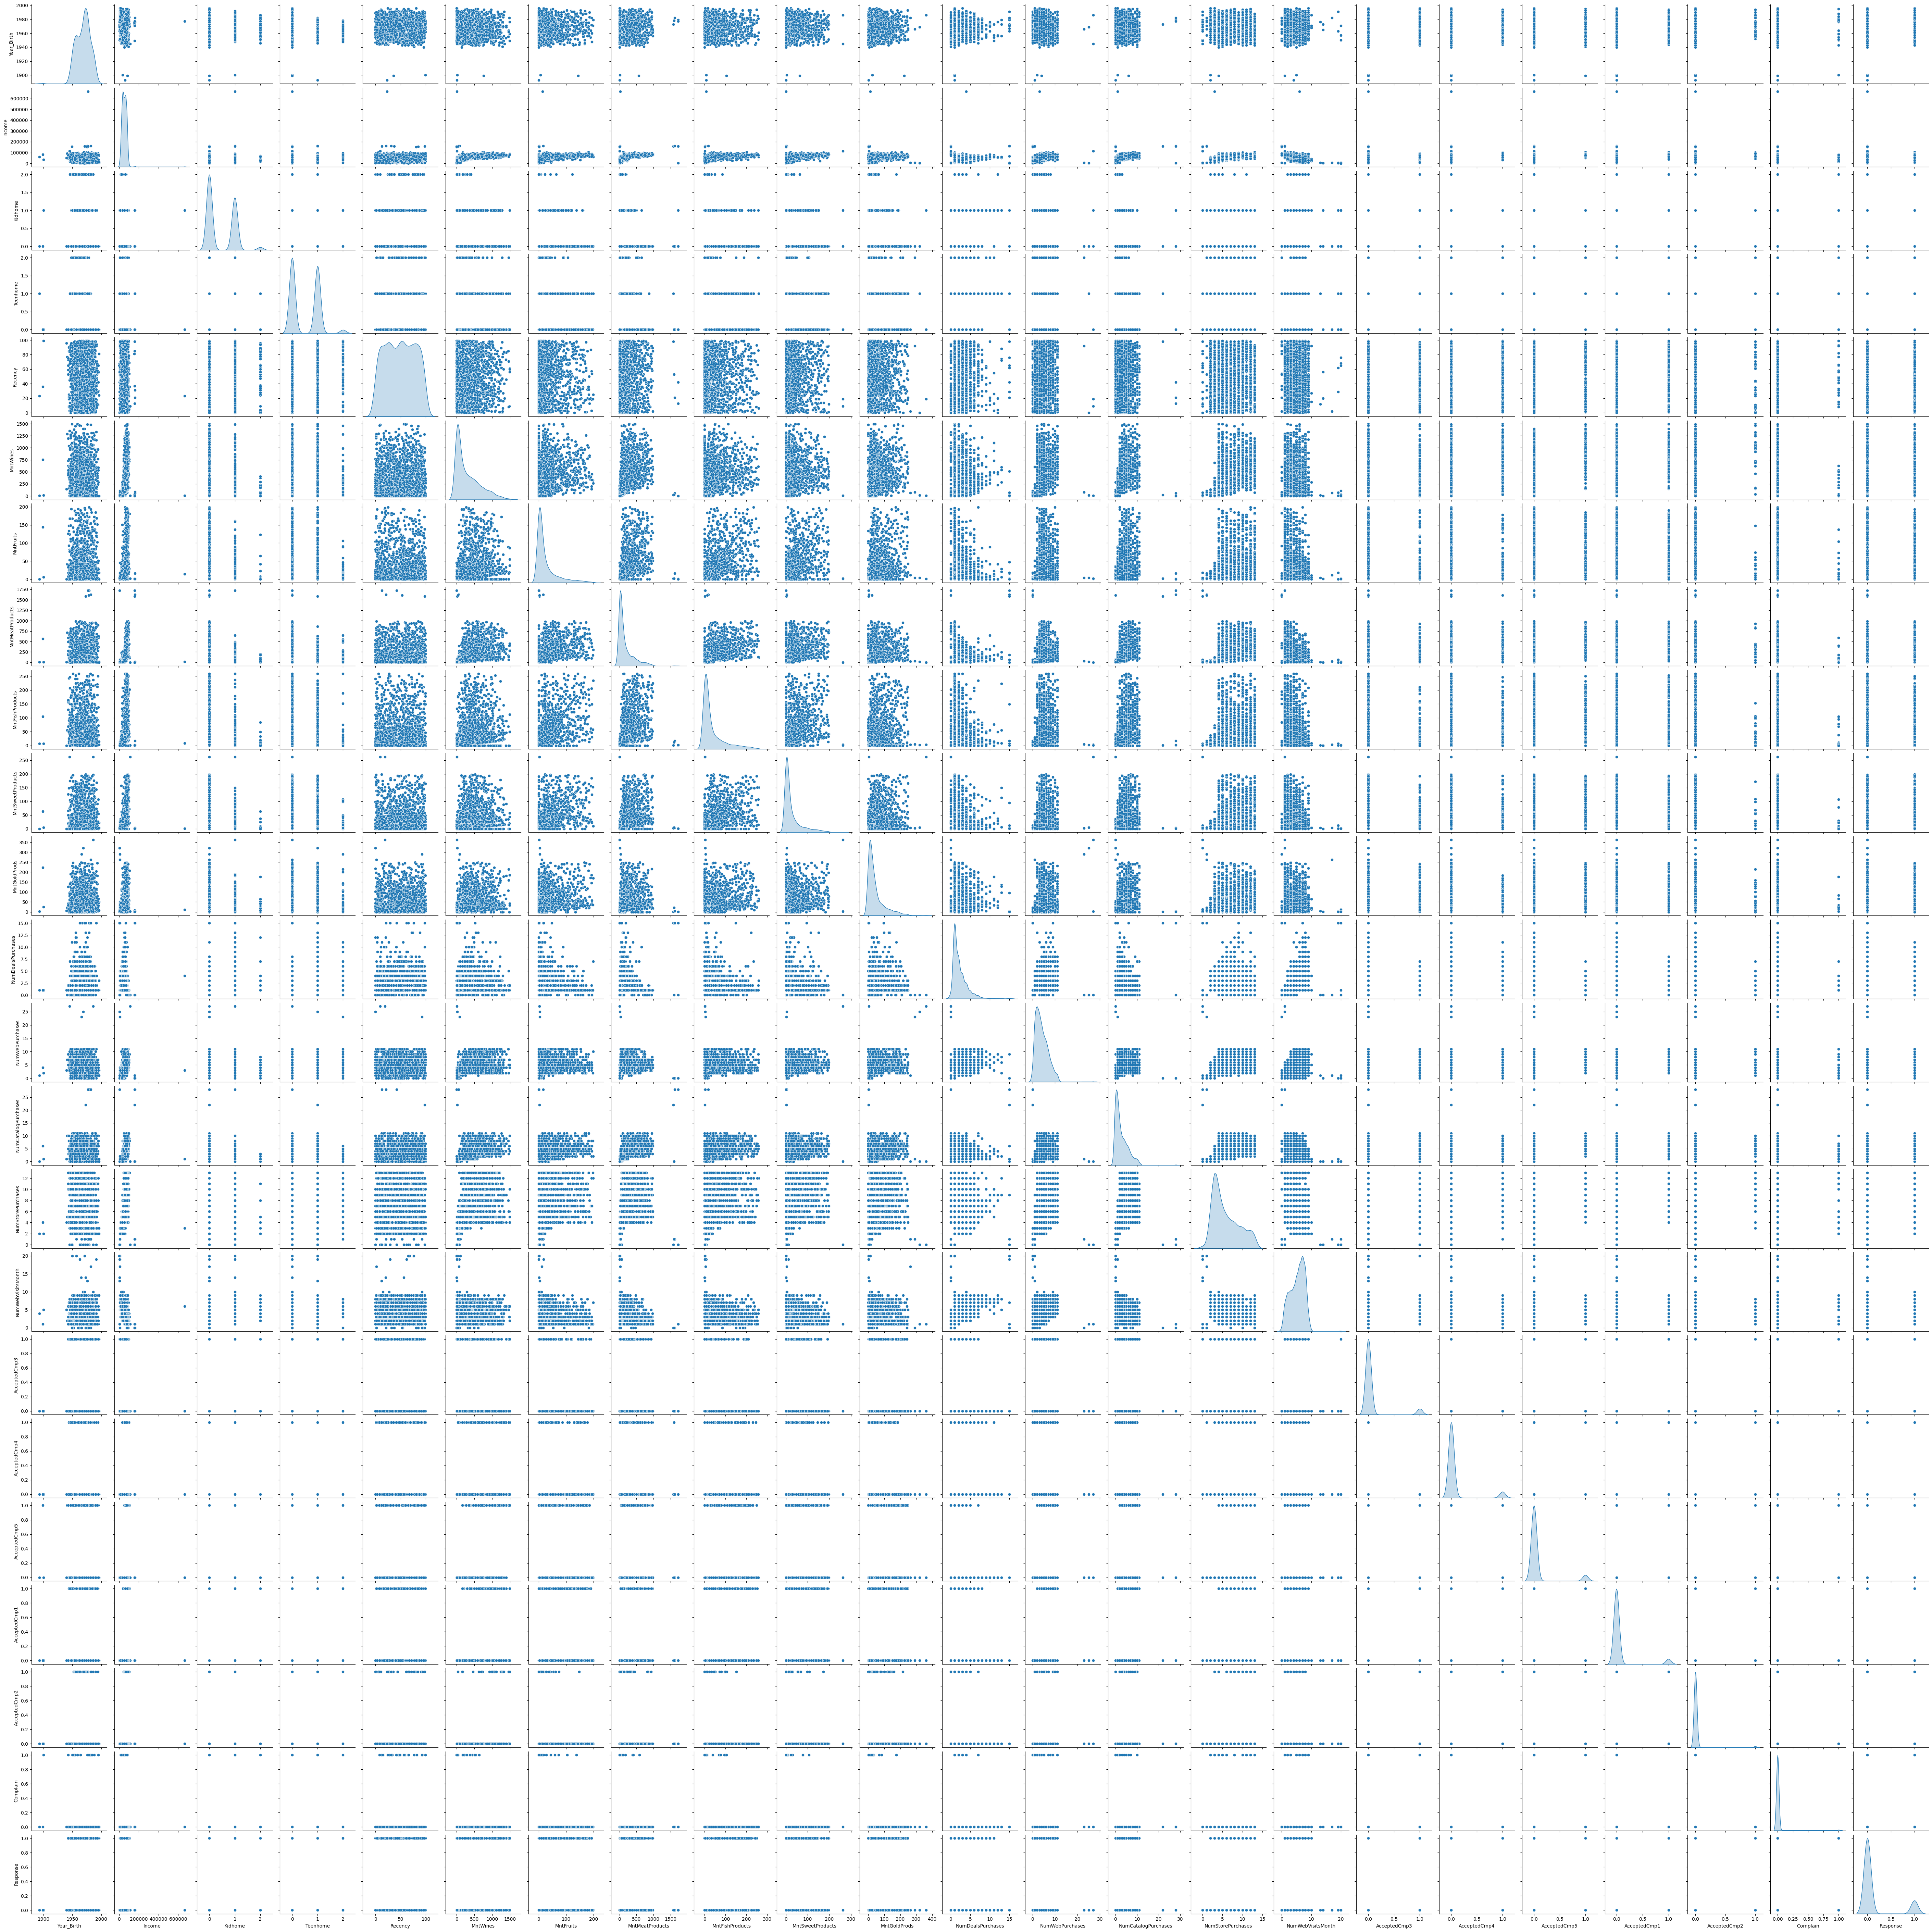

In [29]:
#PAIR PLOT -- Menggunakan Kolom-Kolom yang memiliki korelasi antara kolom dengan target / Response
#corrl = ['income', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases', 'numcatalogpurchases', 'acceptedcmp1']
plt.figure(figsize =(18,8))
sns.pairplot(df_for_corr, diag_kind='kde')

### 3.2. Resultados del análisis de correlación

QUESTION:

- ¿Cuál es la correlación entre cada features y la etiqueta? 
- ¿Qué características son las más features y deben mantenerse?

Features que podríamos mantener las que tienen un valor mayor a 0.2
* Recency
* MntVinos
* MintMeatProducts
* NumCatalogPurchases
* AceptadoCmp3
* AcceptedCmp5
* AcceptedCmp1

De todas las correlaciones entre features-etiqueta, todas se encuentran en el intervalo de 0,00 a 0,33.

--> Se fija el valor umbral en 0,20. Las características de arriba que mantenemos son las que tienen un valor de correlación > 0.20

QUESTION:

- ¿Cuál es la correlación entre las características? 
- ¿Existen patrones interesantes? ¿
- Qué hay que hacer con la característica?

Las features con mayor correlación con el target son:

* [Recency]: El valor de correlación de Recency con otras características tiene un rango de 0,00 a 0,05

* [MntWines]: Las siguientes características se correlacionan con MntWines: Ingresos(0,58), NumComprasCatálogo(0,64), NumComprasTienda(0,64)

* [MntProductosCarne]: Las siguientes características se correlacionan con MntMeatProducts: NumCatalogPurchases(0.72), Income(0.58), MntWines(0.56)

* [NumCatálogoCompras]: Las siguientes características se correlacionan con NumCatalogPurchases: MntProductosCárnicos(0,72), MntVinos(0,64),Ingresos(0,59)

* [AcceptedCmp3]: Las siguientes características se correlacionan con AcceptedCmp3: MntProductosDeOro(0,12)

* [AcceptedCmp5]: Las siguientes características están correlacionadas con AcceptedCmp5: MntWines(0.47), MntMeatProducts(0.37), Income(0.34)

* [AcceptedCmp1]: Las siguientes características se correlacionan con AcceptedCmp1: AcceptedCmp5(0.40), MntWines(0.35), MntMeatProducts(0.31), NumCatalogPurchases(0.31)


A partir de estos resultados, lo más probable es que lo utilicemos como característica prioritaria en la decisión de determinar indicadores de apoyo para categorizar qué clientes son aptos para las campañas.


# 4. Información extraída del análisis y recomendaciones

#### 4.1. Información relevante I

¿Cómo afecta el hecho de tener una casa para niños y otra para adolescentes a los índices de respuesta de los clientes?

In [28]:
df_visual = df.groupby(['Kidhome','Teenhome', 'Response'])['ID'].count().reset_index()
df_visual

Kidhome  Teenhome  Response   ID
0         0         0         0  465
1         0         0         1  168
2         0         1         0  570
3         0         1         1   50
4         0         2         0   27
5         0         2         1    3
6         1         0         0  431
7         1         0         1   66
8         1         1         0  327
9         1         1         1   42
10        1         2         0   19
11        1         2         1    2
12        2         0         0   15
13        2         0         1    2
14        2         1         0   29

In [29]:
df_visual_pivot  = df_visual.pivot_table(index=["Kidhome","Teenhome"], 
                                         columns='Response', 
                                         values="ID")
df_visual_pivot
# Tabla dinámica con respuesta positiva o nevatiga según número de niños en casa

Response              0      1
Kidhome Teenhome              
0       0         465.0  168.0
        1         570.0   50.0
        2          27.0    3.0
1       0         431.0   66.0
        1         327.0   42.0
        2          19.0    2.0
2       0          15.0    2.0
        1          29.0    NaN

<Figure size 2500x2500 with 0 Axes>

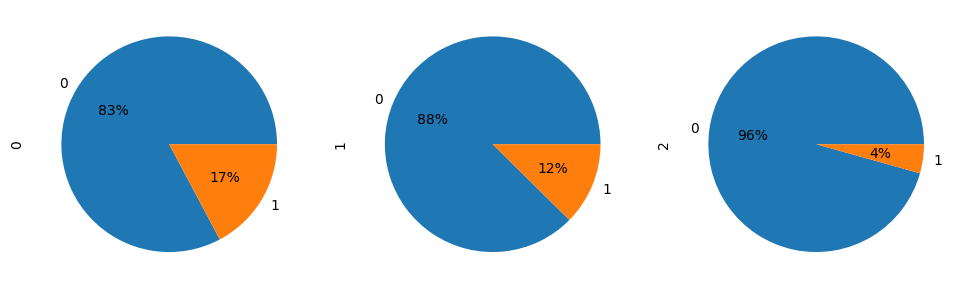

In [31]:
plt.figure(figsize=(25, 25))

pd.crosstab(index=df['Response'], columns=df['Kidhome']).plot(kind="pie", figsize=(16, 8), subplots=True, layout=(2,4),autopct='%1.0f%%', legend=False)
plt.show()

<Figure size 2500x2500 with 0 Axes>

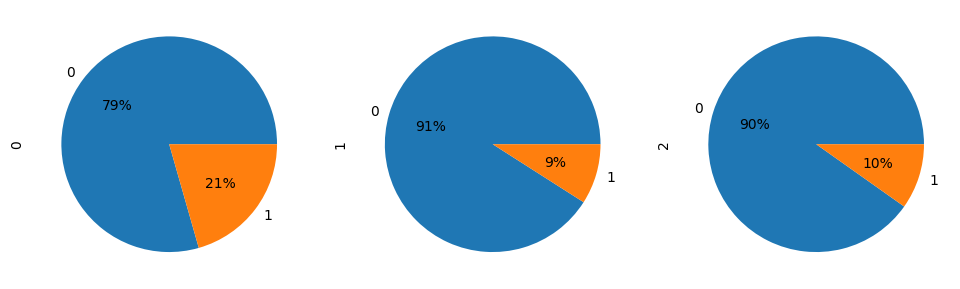

In [34]:
plt.figure(figsize=(25, 25))

pd.crosstab(index=df['Response'], columns=df['Teenhome']).plot(kind="pie", figsize=(16, 8), subplots=True, layout=(2,4),autopct='%1.0f%%', legend=False)
plt.show()

En las casas en las que no hay niños (Kidhome=0) y en las que no hay adolescentes (Teenhome=0) la tasa de respuesta es mayor que en los hogares donde sí hay niños o adolescentes: 17% y 21%, frente a 12%, 4%, 9% y 10%.

#### 4.2. Información relevante II

¿Cuál es el porcentaje de clientes que responden y no responden con el estado civil?

<Figure size 2500x2500 with 0 Axes>

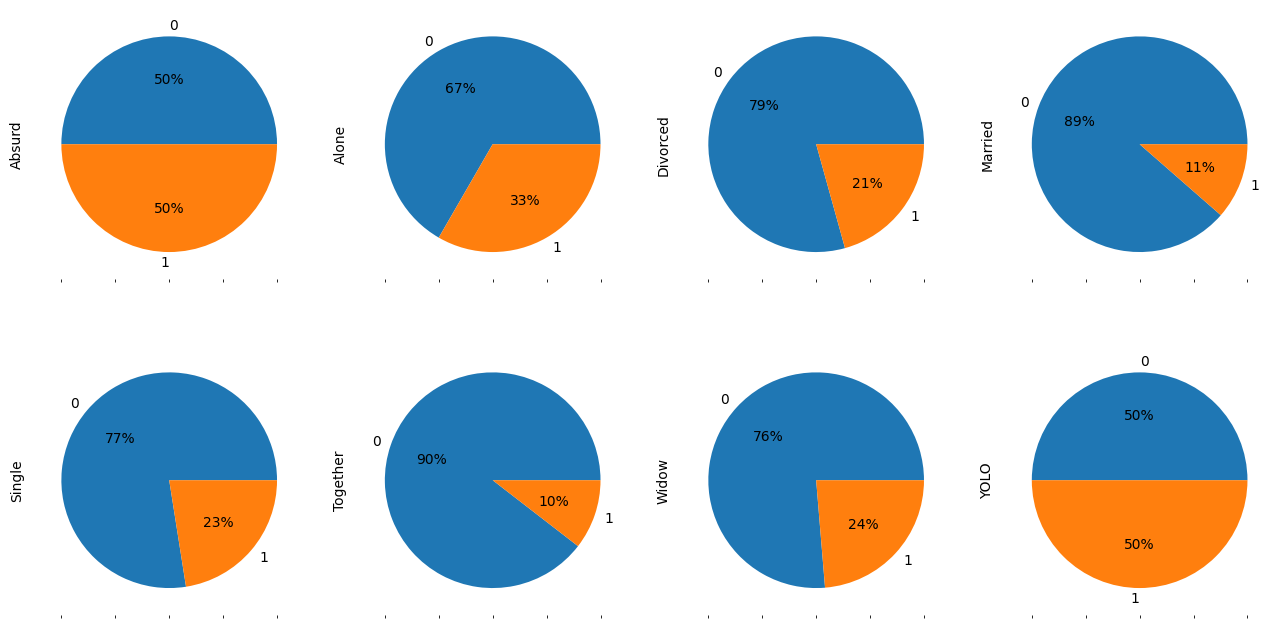

In [30]:
plt.figure(figsize=(25, 25))

pd.crosstab(index=df['Response'], columns=df['Marital_Status']).plot(kind="pie", figsize=(16, 8), subplots=True, layout=(2,4),autopct='%1.0f%%', legend=False)
plt.show()


Los clientes solos y solteros responden más a las campañas de marketing que los clientes casados o con pareja: 33% y 23% frente al 11% y 10%

#### 4.3. Información relevante III

¿Cuál es el porcentaje de clientes que responden y no responden con el nivel de educación?

<Figure size 2000x2000 with 0 Axes>

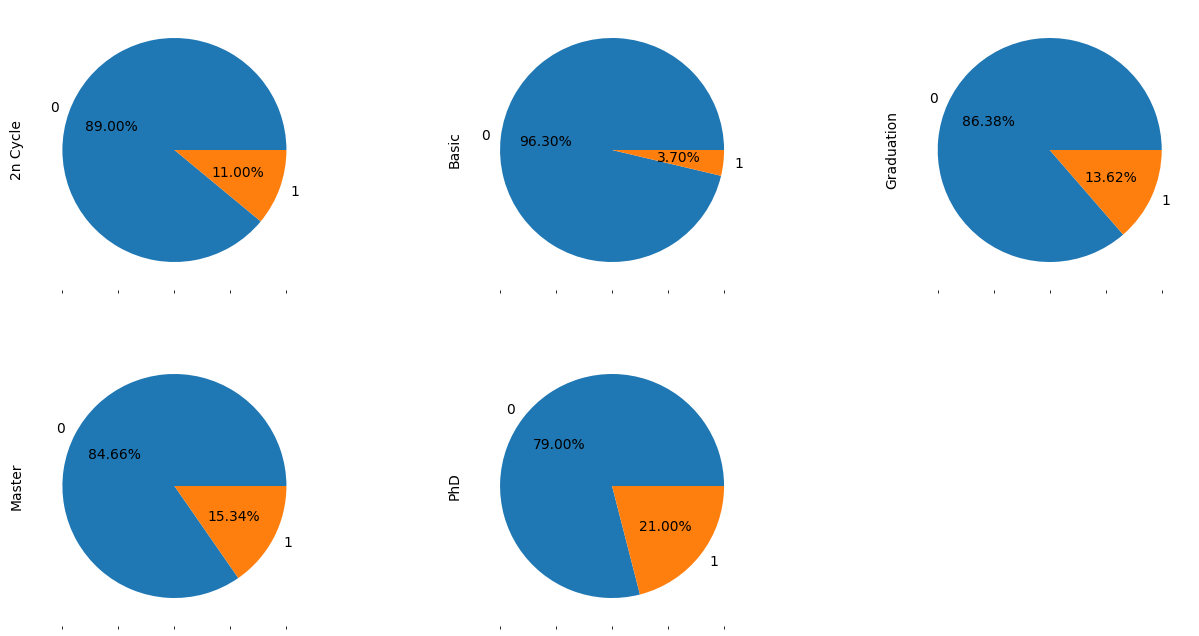

In [36]:
plt.figure(figsize=(20, 20))

pd.crosstab(index=df['Response'], columns=df['Education']).plot(kind="pie", figsize=(16, 8), layout = (2,3), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

Los clientes con educación superior (Graduados, PhD y Máster) responden más a las campañas de márketing que los que tienen educación elemental (básica o ciclo superior)

#### 4.4. Recomendación

Recomendaciones que puede proporcionar el equipo de científicos de datos al equipo de marketing:

* De la visualización de kidhome y teenhome: los clientes que más responden provienen de clientes que no tienen hijos y no tienen adolescentes --> se deberían centrar las campañas en clientes que no tienen hijos y no tienen adolescentes.
  
* De la visualización del piechart Estado civil: los clientes que más respondieron procedían de clientes que no tienen pareja --> se deberían centrar las campañas en los clientes Solteros.
  
* De la visualización del diagrama de sectores de educación: los clientes que más respondieron son los que tienen educación superior (graduados, PhD y máster) --> se debería centrar las campañas en estos clientes.

Siguientes mejoras:

- Hay productos que tiene una fuerte correlación (Oro, Carne y Vinos) con las campañas 1 a 5.

- Los resultados de esta visualización (con pie charts) pueden ser utilizados posteriormente por la empresa para priorizar qué productos vender o promocionar con el fin de atraer al mayor número de clientes. 

- Si se espera que con un aumento del número de clientes, los ingresos de la empresa también puedan aumentar.




---



---



# 5. Preprocesado de datos

In [37]:
#import library

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# ubah parameter default matplotlib dengan rcParams
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [38]:
# Load data
df = pd.read_csv('data/marketing_campaign.csv', delimiter = ';')

#categorized each column based on num or cat data type, column that has only 1 unique value (Z_CostContact and Z_Revenue) is not categorized
cats = ['Education', 'Marital_Status'] #feature categorical and string
cats_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']  #feature categorical and int
nums_int = ['Year_Birth', 'Income', 'Recency']  #feature numerical and int
nums_product = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'] #feature numerical and int
nums_purchase = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] #feature numerical and int
timestamp = ['Dt_Customer'] #feature timestamp

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

### 5.1. Limpieza de datos y feature engineering

#### 5.1.1. Handle Missing Values

In [39]:
# check missing value
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [40]:
#calculating the percentage of null rows
percent_null = (df['Income'].isna().sum()) / len(df.index) * 100
percent_null

1.0714285714285714

Según los resultados del análisis inicial, se observa que hay 24 filas de datos en blanco en la columna de ingresos, con un porcentaje del 1,07% de los datos totales, lo que significa que está muy por debajo del límite de seguridad para la eliminación de datos (10%). 

Así pues, la decisión que tomamos con respecto al valor omitido fue eliminar todas las filas de la columna Ingresos que tuvieran un valor nulo (vacío).

In [41]:
#deleting rows with missing value
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### 5.1.2. Handle Duplicated Data

In [35]:
#check any duplicated
df.duplicated().any()

False

No se han encontrado filas de datos duplicadas --> no es necesario tratar los datos duplicados.

### 5.1.3. Handle Outliers

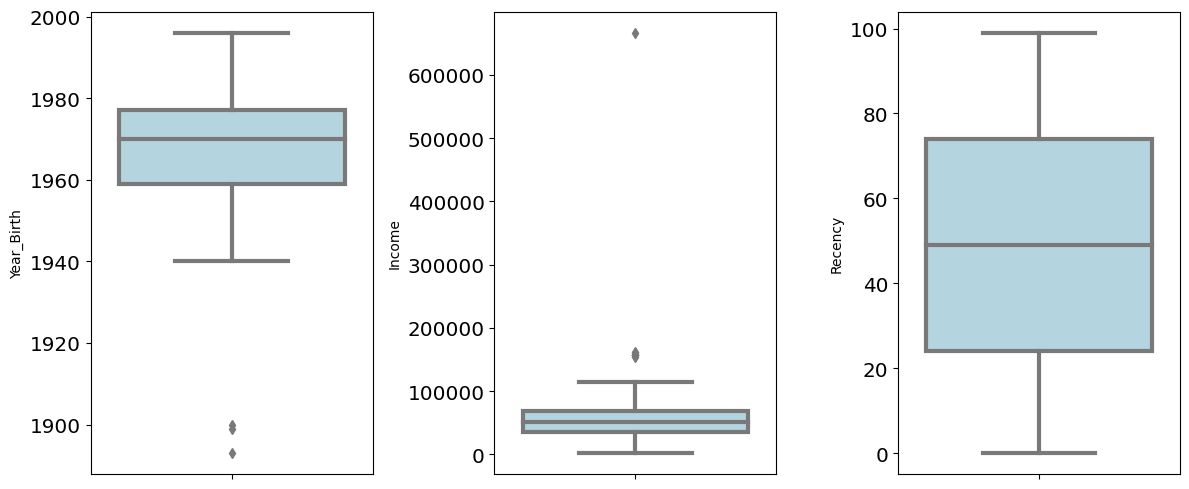

In [36]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df[nums_int[i]], color='lightblue', orient='v')
    plt.tight_layout()

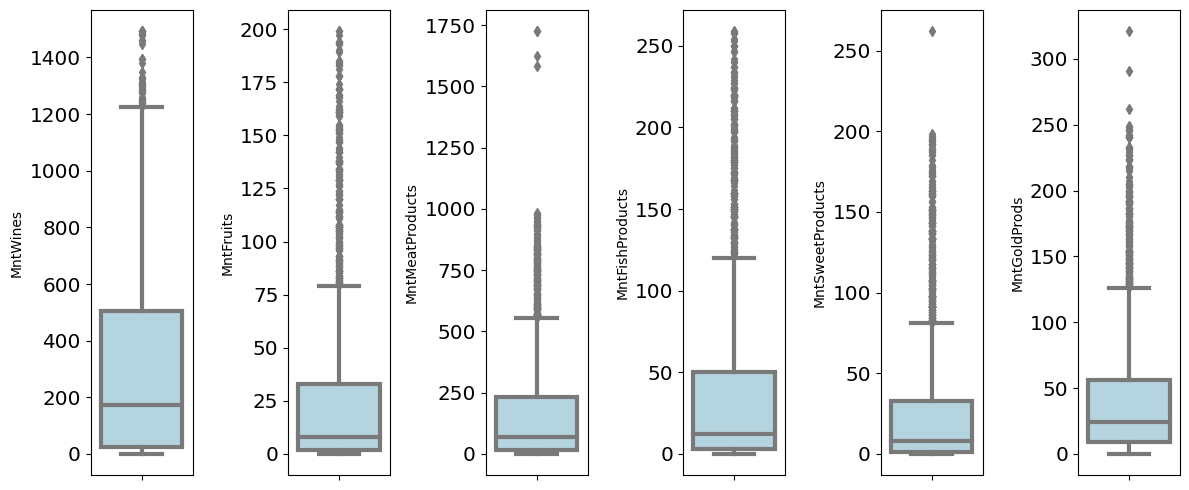

In [37]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df[nums_product[i]], color='lightblue', orient='v')
    plt.tight_layout()

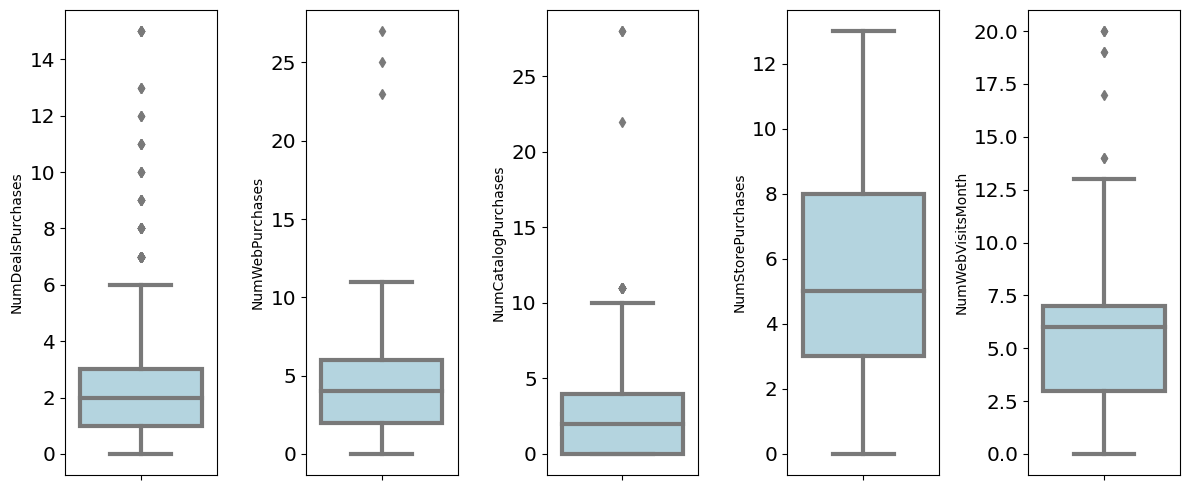

In [38]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df[nums_purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

Hay outliers en:
- "Ingresos"
- "AñoNacimiento"
- "Recency"
- "MntVinos"
- "MntFrutas"
- "MntProductosCárnicos"
- "MntProductosPescados"
- "MntProductosDulces"
- "MntProductosOro"
- "NumDealsCompras"
- "NumWebCompras"
- "NumWebVisitasMes"

Los outliers se van a eliminar con un z-score y también el IQR para minimizar el número de outliers contenidos en el conjunto de datos.

#### Eliminar Outliers con Z-score

In [42]:
df_z = pd.read_csv('data/marketing_campaign.csv', delimiter = ';')
df_z.dropna(inplace = True)

print(f'Outlier: {len(df_z)}')

filtered_enteries = np.array([True] * len (df_z))

for col in ['Income', 'Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']:
    zscore = abs(stats.zscore(df_z[col]))
    filtered_enteries = (zscore < 3) & filtered_enteries
    
df_z = df_z[filtered_enteries]

print(f'Outlierr: {len(df_z)}')

Outlier: 2216
Outlierr: 1953


#### Eliminar Outlier con IQR

In [43]:
df_iqr = pd.read_csv('data/marketing_campaign.csv', delimiter = ';')
df_iqr.dropna(inplace = True)

outliers = ['Year_Birth','Income','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']

print(f'Outlier: {len(df_iqr)}')

filtered_entries = np.array([True] * len(df_iqr))

for i in outliers:
    Q1 = df_iqr[i].quantile(0.25)
    Q3 = df_iqr[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)
    
    filtered_entries = ((df_iqr[i] >= low_limit) & (df_iqr[i] <= high_limit)) & filtered_entries
    
df_iqr = df_iqr[filtered_entries]

print(f'Outlier: {len(df_iqr)}')

Outlier: 2216
Outlier: 1506


El número de filas eliminadas según la IQR es muy superior a la puntuación Z, que se sitúa en torno a >30% del total de filas de datos eliminadas.

Elegimos el método de puntuación Z para eliminar los valores atípicos.

After that, we plotted boxplots to see again the distribution of outliers in each feature.

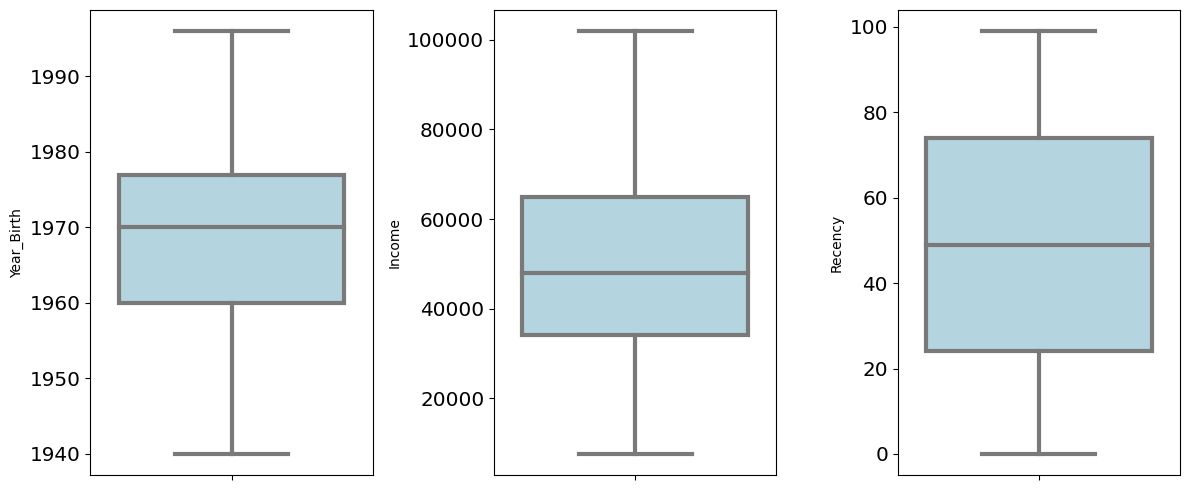

In [44]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_int)):
    plt.subplot(1, len(nums_int), i+1)
    sns.boxplot(y=df_z[nums_int[i]], color='lightblue', orient='v')
    plt.tight_layout()

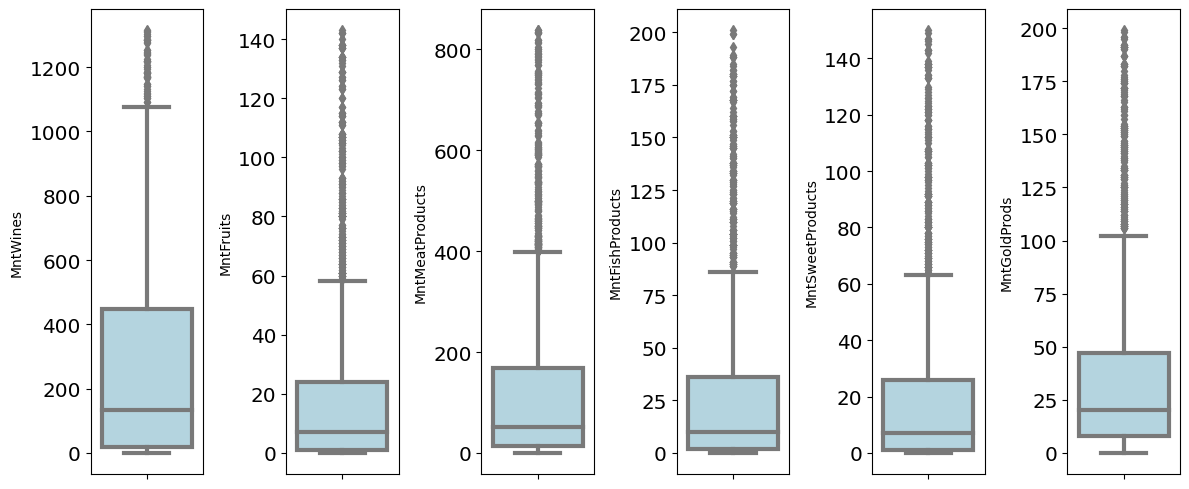

In [45]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_product)):
    plt.subplot(1, len(nums_product), i+1)
    sns.boxplot(y=df_z[nums_product[i]], color='lightblue', orient='v')
    plt.tight_layout()

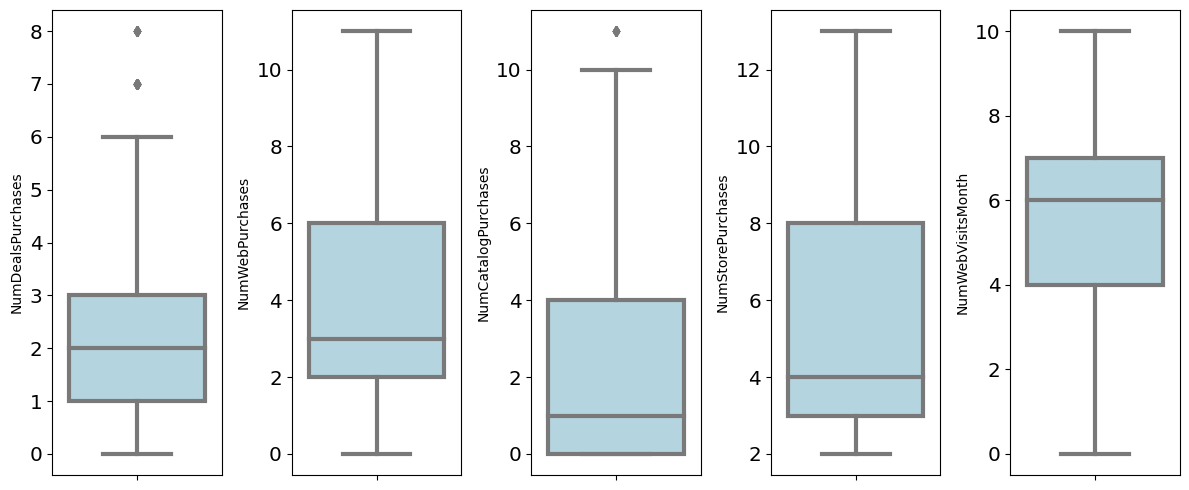

In [46]:
plt.figure(figsize=(12,5))
for i in range(0, len(nums_purchase)):
    plt.subplot(1, len(nums_purchase), i+1)
    sns.boxplot(y=df_z[nums_purchase[i]], color='lightblue', orient='v')
    plt.tight_layout()

### 5.1.4. Feature engineering

In [47]:
df=df_z

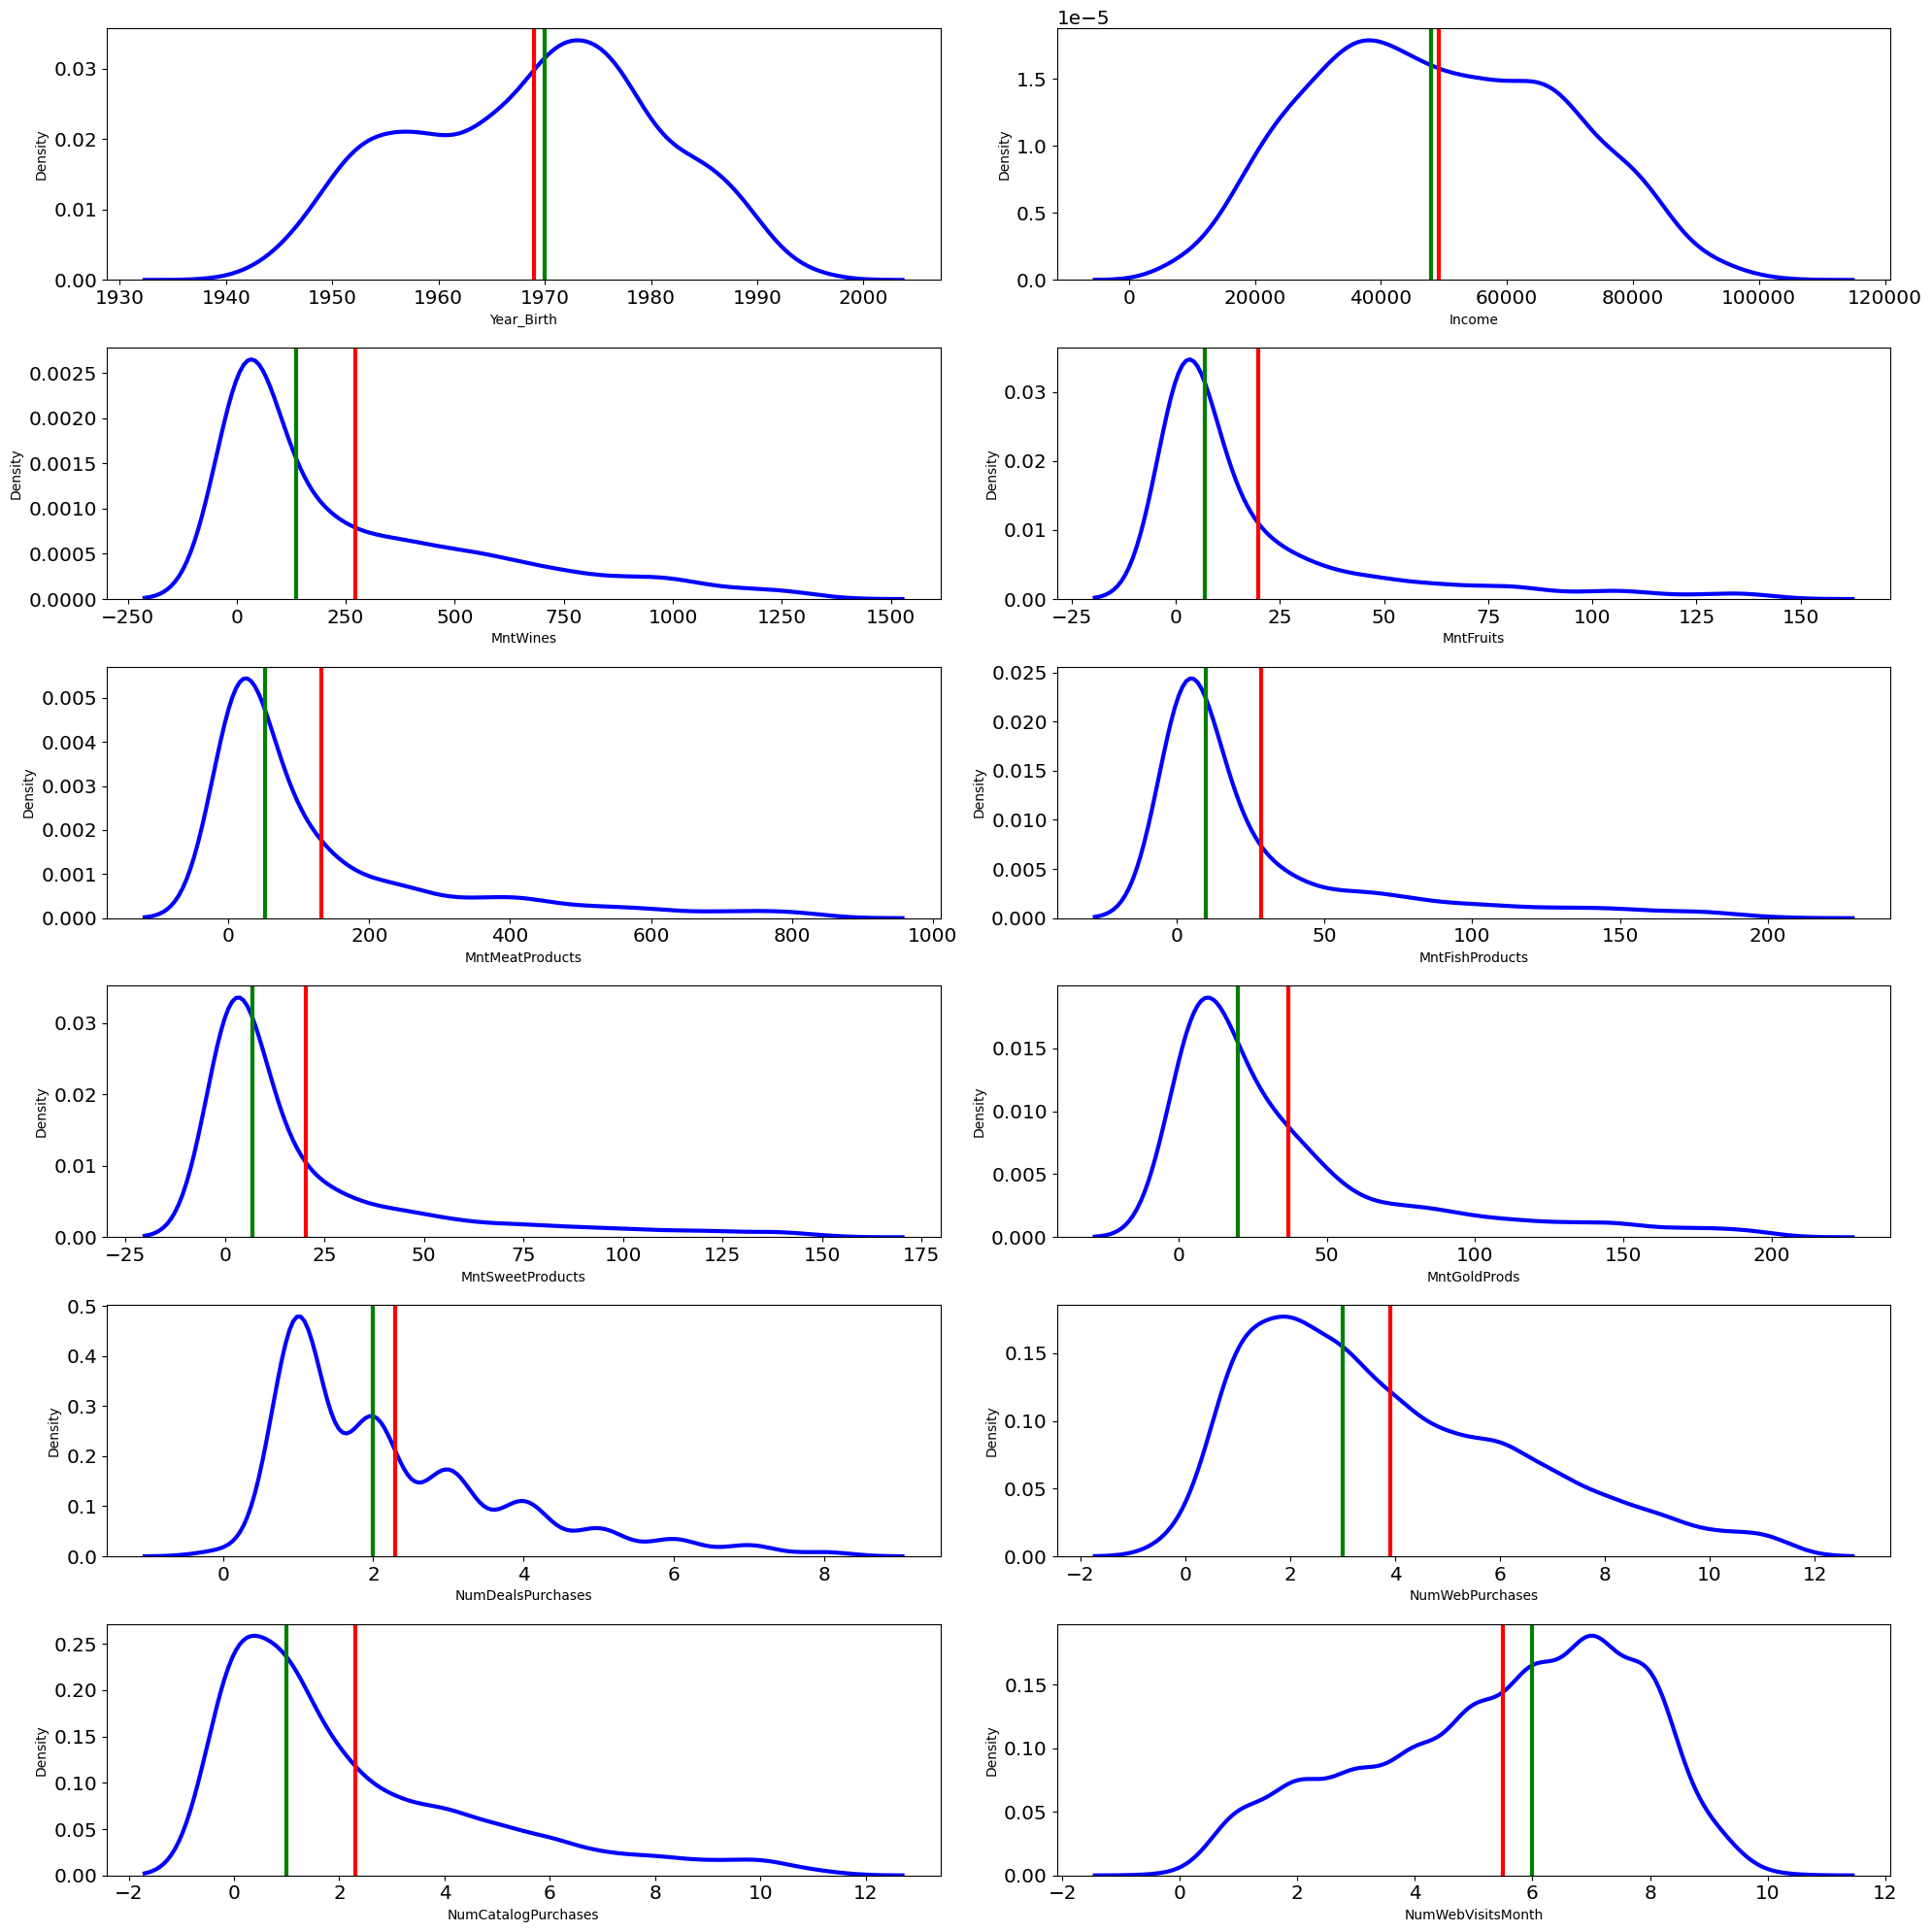

In [48]:
#check the graph for each outlier column

plt.figure(figsize=(20,20))
for i in range(0, len(outliers)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(df[outliers[i]], color='blue')
    plt.tight_layout()
    
    # make a vertical line of mean and median
    plt.axvline(x=df[outliers[i]].mean(), color = 'red')
    plt.axvline(x=df[outliers[i]].median(), color = 'green')

Basándonos en el gráfico anterior, se puede observar que existe un sesgo positivo en las características "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases" .

Así pues, hemos mejorado estas características con técnicas de transformación de características utilizando el método de transformación logarítmica.

In [49]:
positive_skewed = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                   'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases']

# check skewness value
for i in positive_skewed:
    skewness = df[i].skew(axis=0, skipna=True)
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 1.2704786643137906
skewness feature MntFruits adalah 2.108011346690099
skewness feature MntMeatProducts adalah 1.9170849507890875
skewness feature MntFishProducts adalah 1.965486056831826
skewness feature MntSweetProducts adalah 2.101542394722874
skewness feature MntGoldProds adalah 1.758032451602574
skewness feature NumDealsPurchases adalah 1.31591642250104
skewness feature NumWebPurchases adalah 0.7869758319537213
skewness feature NumCatalogPurchases adalah 1.348368752280952


#### Log Transformation

In [50]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957  Graduation         Single  58138.0        0         0   
1     2174        1954  Graduation         Single  46344.0        1         1   
2     4141        1965  Graduation       Together  71613.0        0         0   
3     6182        1984  Graduation       Together  26646.0        1         0   
4     5324        1981         PhD        Married  58293.0        1         0   
...    ...         ...         ...            ...      ...      ...       ...   
2234  8372        1974  Graduation        Married  34421.0        1         0   
2236  4001        1946         PhD       Together  64014.0        2         1   
2237  7270        1981  Graduation       Divorced  56981.0        0         0   
2238  8235        1956      Master       Together  69245.0        0         1   
2239  9405        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0     2012-09-04       58       635  ...                  7             0   
1     2014-03-08       38        11  ...                  5             0   
2     2013-08-21       26       426  ...                  4             0   
3     2014-02-10       26        11  ...                  6             0   
4     2014-01-19       94       173  ...                  5             0   
...          ...      ...       ...  ...                ...           ...   
2234  2013-07-01       81         3  ...                  7             0   
2236  2014-06-10       56       406  ...                  7             0   
2237  2014-01-25       91       908  ...                  6             0   
2238  2014-01-24        8       428  ...                  3             0   
2239  2012-10-15       40        84  ...                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2234             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
0                 3         11         1  
1                 3         11         0  
2                 3         11         0  
3                 3         11         0  
4                 3         11         0  
...             ...        ...       ...  
2234              3         11         0  
2236              3         11         0  
2237              3         11         0  
2238              3         11         0  
2239              3         11         1  

[1953 rows x 29 columns]

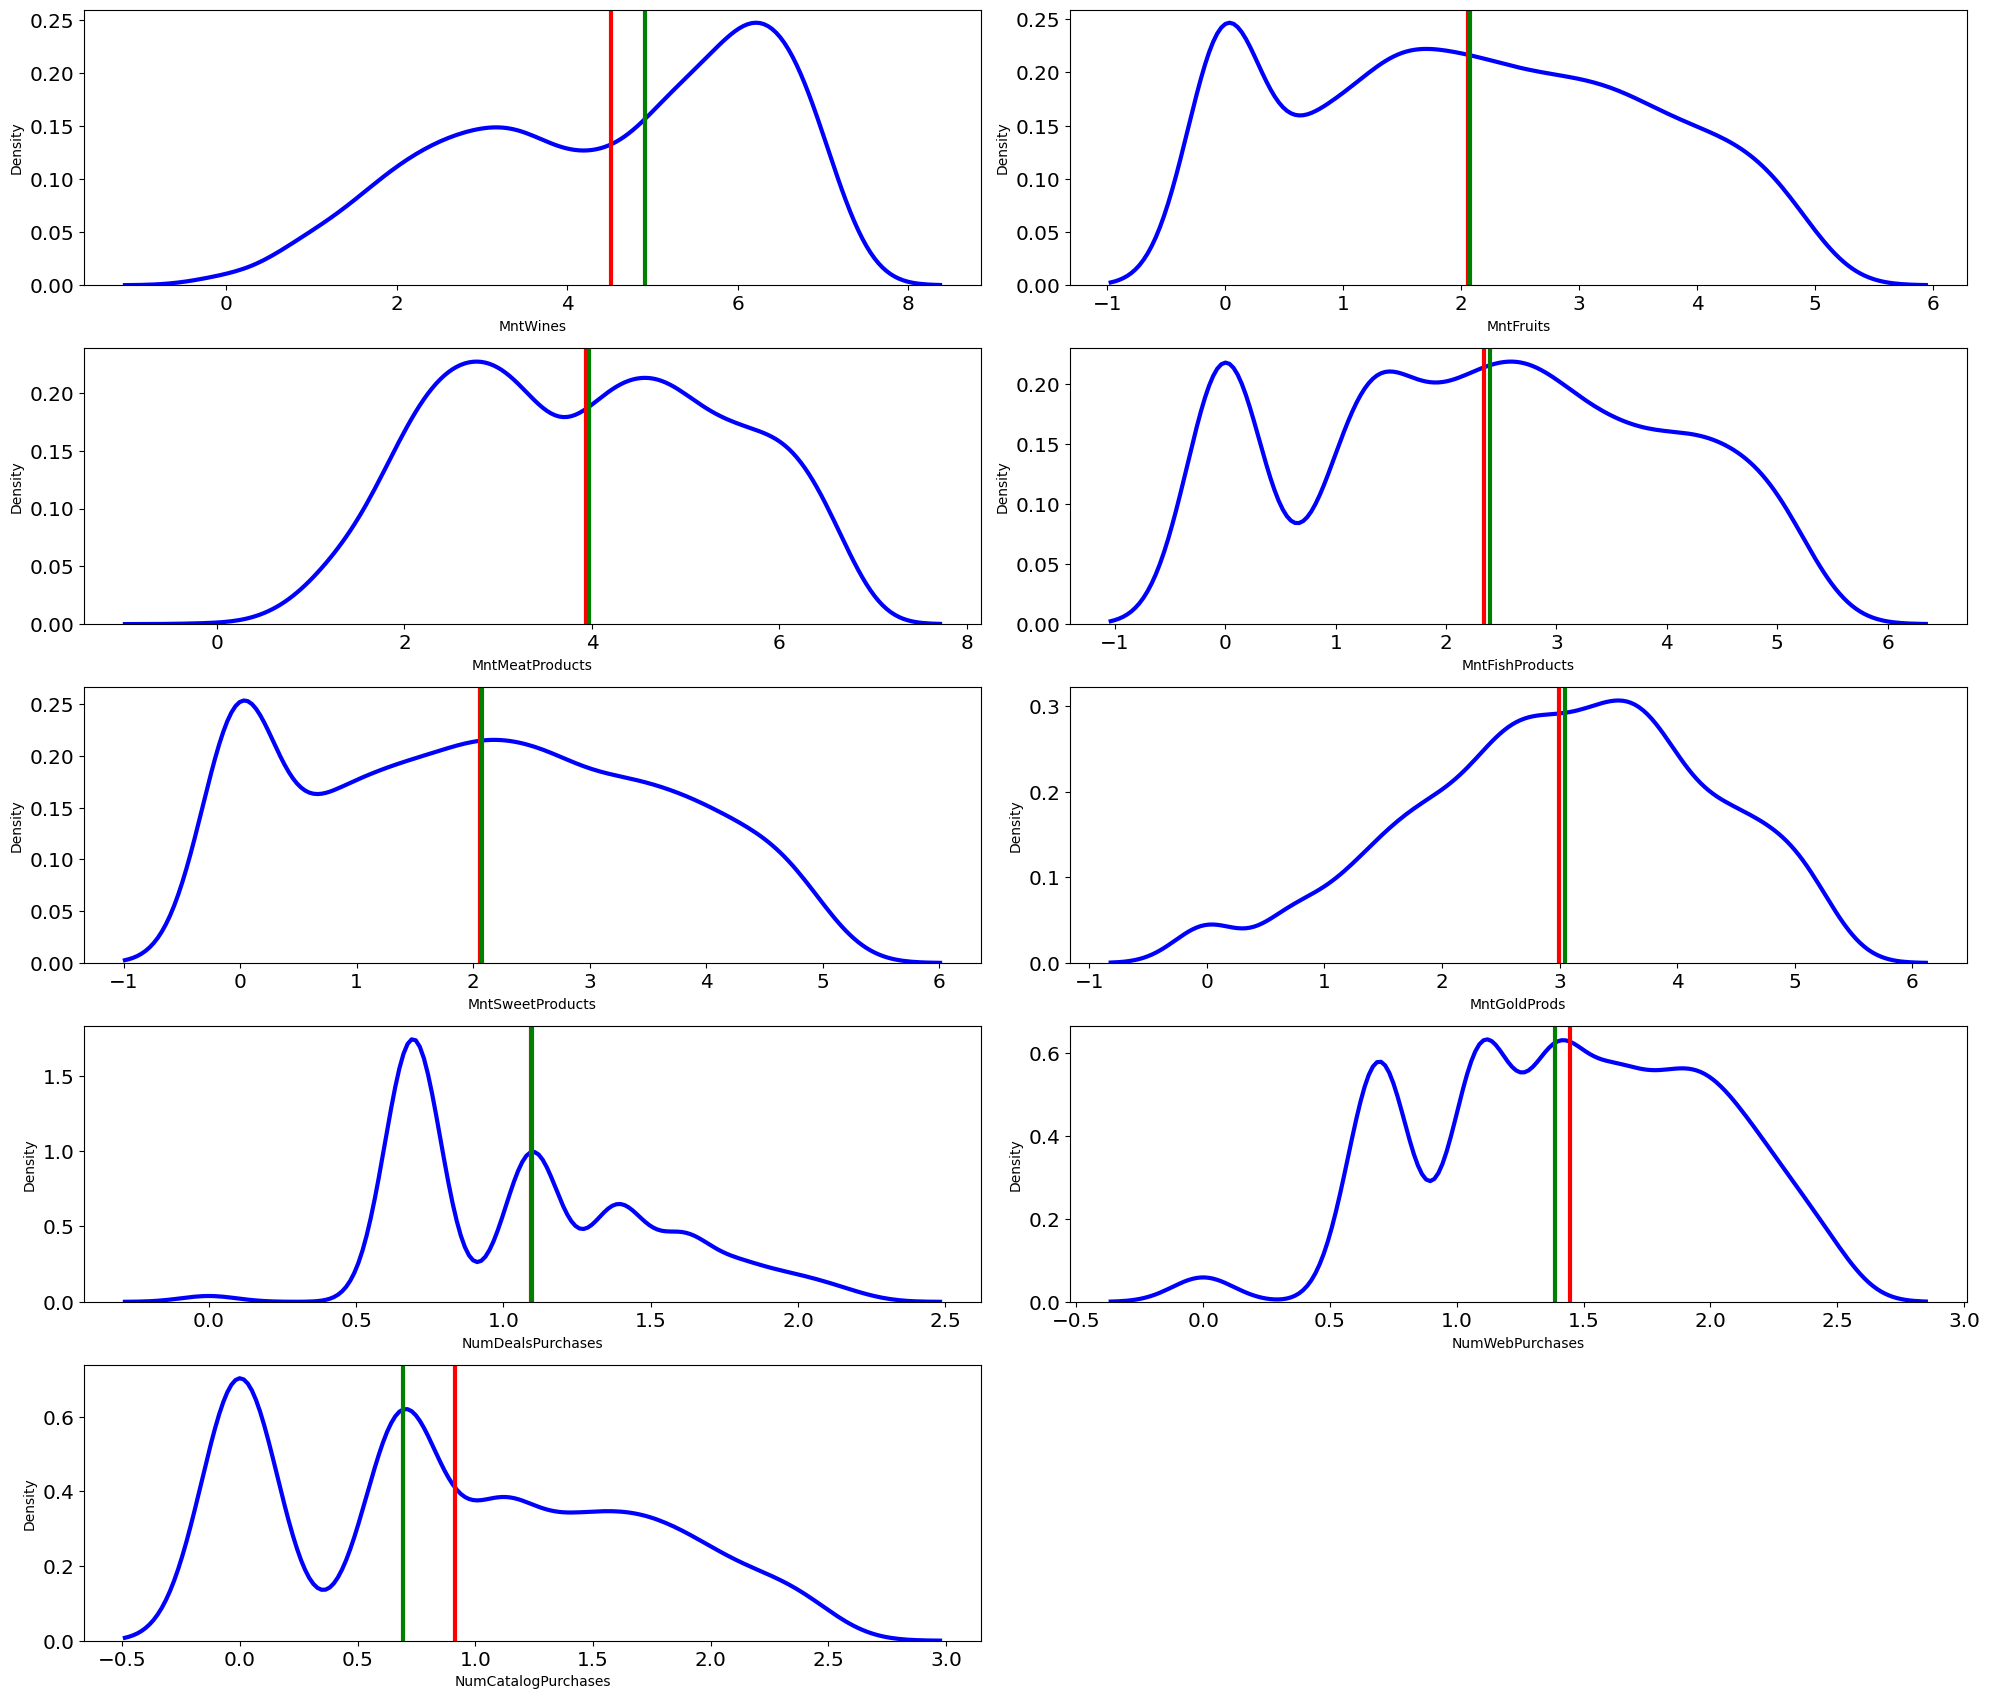

In [55]:
# Transformación logarítmica para las variables con + skewed
plt.figure(figsize=(20,20))
for i in range(0, len(positive_skewed)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(np.log(df[positive_skewed[i]]+1), color='blue')
    plt.axvline(x=np.log(df[positive_skewed[i]]+1).mean(), color = 'red')
    plt.axvline(x=np.log(df[positive_skewed[i]]+1).median(), color = 'green')
    plt.tight_layout()

Ahora media y mediana están mucho más cerca (o coinciden) en los datos

In [56]:
# check skewness value
for i in positive_skewed:
    skewness = np.log(df[i].skew(axis=0, skipna=True))
    print('skewness feature',i,'adalah', skewness)

skewness feature MntWines adalah 0.2393937304956276
skewness feature MntFruits adalah 0.745745013344942
skewness feature MntMeatProducts adalah 0.6508057775256199
skewness feature MntFishProducts adalah 0.6757395718998083
skewness feature MntSweetProducts adalah 0.7426715488131432
skewness feature MntGoldProds adalah 0.5641952584797426
skewness feature NumDealsPurchases adalah 0.27453332214854864
skewness feature NumWebPurchases adalah -0.2395577401166722
skewness feature NumCatalogPurchases adalah 0.2988955301853037


Tras la transformación logarítmica se observa que los valores generales de asimetría tienen un rango más uniforme (ni mucho ni muy variado). 

Por lo tanto, se puede concluir que la técnica de transformación de características que hemos realizado es válida y decidimos crear una nueva columna llena de valores para las características que se han procesado.

In [57]:
for i in positive_skewed:
    new_i = 'log_' + i
    df[new_i] = np.log(df[i]+1) #plus 1 to prevent -inf

In [58]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Response  log_MntWines  log_MntFruits  \
0  2012-09-04       58       635  ...         1      6.455199       4.488636   
1  2014-03-08       38        11  ...         0      2.484907       0.693147   
2  2013-08-21       26       426  ...         0      6.056784       3.912023   
3  2014-02-10       26        11  ...         0      2.484907       1.609438   
4  2014-01-19       94       173  ...         0      5.159055       3.784190   

   log_MntMeatProducts  log_MntFishProducts  log_MntSweetProducts  \
0             6.304449             5.153292              4.488636   
1             1.945910             1.098612              0.693147   
2             4.852030             4.718499              3.091042   
3             3.044522             2.397895              1.386294   
4             4.779123             3.850148              3.332205   

   log_MntGoldProds  log_NumDealsPurchases  log_NumWebPurchases  \
0          4.488636               1.386294             2.197225   
1          1.945910               1.098612             0.693147   
2          3.761200               0.693147             2.197225   
3          1.791759               1.098612             1.098612   
4          2.772589               1.791759             1.791759   

   log_NumCatalogPurchases  
0                 2.397895  
1                 0.693147  
2                 1.098612  
3                 0.000000  
4                 1.386294  

[5 rows x 38 columns]

### 5.1.5. Feature Encoding

Después de realizar la transformación de características, se raliza la codificación de características en las columnas que tienen tipos de datos categóricos para convertirlos en numéricos. 

Hacemos esto con la esperanza de que las capacidades de aprendizaje automático que creamos puedan mejorar. Las siguientes son algunas de las características en las que estamos trabajando en esta etapa:


1. Mapping_marital, basado en Marital_status.
2. Mapping_education, basado en Education

#### Label Encoding

In [59]:
mapping_marital = {
    'Absurd' : 0,
    'Alone' : 0,
    'Divorced' : 0,
    'Single' : 0,
    'Widow' : 0,
    'YOLO' : 0,
    'Together' : 1,
    'Married' : 1
}
df['Marital_Status'] = df['Marital_Status'].map(mapping_marital)
df.head()

ID  Year_Birth   Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation               0  58138.0        0         0   
1  2174        1954  Graduation               0  46344.0        1         1   
2  4141        1965  Graduation               1  71613.0        0         0   
3  6182        1984  Graduation               1  26646.0        1         0   
4  5324        1981         PhD               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  Response  log_MntWines  log_MntFruits  \
0  2012-09-04       58       635  ...         1      6.455199       4.488636   
1  2014-03-08       38        11  ...         0      2.484907       0.693147   
2  2013-08-21       26       426  ...         0      6.056784       3.912023   
3  2014-02-10       26        11  ...         0      2.484907       1.609438   
4  2014-01-19       94       173  ...         0      5.159055       3.784190   

   log_MntMeatProducts  log_MntFishProducts  log_MntSweetProducts  \
0             6.304449             5.153292              4.488636   
1             1.945910             1.098612              0.693147   
2             4.852030             4.718499              3.091042   
3             3.044522             2.397895              1.386294   
4             4.779123             3.850148              3.332205   

   log_MntGoldProds  log_NumDealsPurchases  log_NumWebPurchases  \
0          4.488636               1.386294             2.197225   
1          1.945910               1.098612             0.693147   
2          3.761200               0.693147             2.197225   
3          1.791759               1.098612             1.098612   
4          2.772589               1.791759             1.791759   

   log_NumCatalogPurchases  
0                 2.397895  
1                 0.693147  
2                 1.098612  
3                 0.000000  
4                 1.386294  

[5 rows x 38 columns]

In [60]:
mapping_education = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}
df['Education'] = df['Education'].map(mapping_education)
df

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957          1               0  58138.0        0         0   
1     2174        1954          1               0  46344.0        1         1   
2     4141        1965          1               1  71613.0        0         0   
3     6182        1984          1               1  26646.0        1         0   
4     5324        1981          3               1  58293.0        1         0   
...    ...         ...        ...             ...      ...      ...       ...   
2234  8372        1974          1               1  34421.0        1         0   
2236  4001        1946          3               1  64014.0        2         1   
2237  7270        1981          1               0  56981.0        0         0   
2238  8235        1956          2               1  69245.0        0         1   
2239  9405        1954          3               1  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  Response  log_MntWines  \
0     2012-09-04       58       635  ...         1      6.455199   
1     2014-03-08       38        11  ...         0      2.484907   
2     2013-08-21       26       426  ...         0      6.056784   
3     2014-02-10       26        11  ...         0      2.484907   
4     2014-01-19       94       173  ...         0      5.159055   
...          ...      ...       ...  ...       ...           ...   
2234  2013-07-01       81         3  ...         0      1.386294   
2236  2014-06-10       56       406  ...         0      6.008813   
2237  2014-01-25       91       908  ...         0      6.812345   
2238  2014-01-24        8       428  ...         0      6.061457   
2239  2012-10-15       40        84  ...         1      4.442651   

      log_MntFruits  log_MntMeatProducts  log_MntFishProducts  \
0          4.488636             6.304449             5.153292   
1          0.693147             1.945910             1.098612   
2          3.912023             4.852030             4.718499   
3          1.609438             3.044522             2.397895   
4          3.784190             4.779123             3.850148   
...             ...                  ...                  ...   
2234       1.386294             2.079442             1.945910   
2236       0.000000             3.433987             0.000000   
2237       3.891820             5.384495             3.496508   
2238       3.433987             5.370638             4.394449   
2239       1.386294             4.127134             1.098612   

      log_MntSweetProducts  log_MntGoldProds  log_NumDealsPurchases  \
0                 4.488636          4.488636               1.386294   
1                 0.693147          1.945910               1.098612   
2                 3.091042          3.761200               0.693147   
3                 1.386294          1.791759               1.098612   
4                 3.332205          2.772589               1.791759   
...                    ...               ...                    ...   
2234              1.098612          2.302585               0.693147   
2236              0.000000          2.197225               2.079442   
2237              2.564949          3.218876               0.693147   
2238              3.433987          4.127134               1.098612   
2239              0.693147          3.091042               1.386294   

      log_NumWebPurchases  log_NumCatalogPurchases  
0                2.197225                 2.397895  
1                0.693147                 0.693147  
2                2.197225                 1.098612  
3                1.098612                 0.000000  
4                1.791759                 1.386294  
...                   ...                      ...  
2234             0.693147                 0.000000  
2236             2.197225                 1.098612  
2237             1.098612                 1.386294  
2238             1.945910                 1.791759  
2

#### One Hot Encoding

In [61]:
#menggabungkan value pada kolom education 
df.Education = df.Education.apply(lambda x : "Master" if (x=="2n Cycle") else x)

#One Hot Encoding 
prefix_educ = pd.get_dummies(df['Education'], prefix='is')

df = df.join(prefix_educ)
df

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0     5524        1957          1               0  58138.0        0         0   
1     2174        1954          1               0  46344.0        1         1   
2     4141        1965          1               1  71613.0        0         0   
3     6182        1984          1               1  26646.0        1         0   
4     5324        1981          3               1  58293.0        1         0   
...    ...         ...        ...             ...      ...      ...       ...   
2234  8372        1974          1               1  34421.0        1         0   
2236  4001        1946          3               1  64014.0        2         1   
2237  7270        1981          1               0  56981.0        0         0   
2238  8235        1956          2               1  69245.0        0         1   
2239  9405        1954          3               1  52869.0        1         1   

     Dt_Customer  Recency  MntWines  ...  log_MntFishProducts  \
0     2012-09-04       58       635  ...             5.153292   
1     2014-03-08       38        11  ...             1.098612   
2     2013-08-21       26       426  ...             4.718499   
3     2014-02-10       26        11  ...             2.397895   
4     2014-01-19       94       173  ...             3.850148   
...          ...      ...       ...  ...                  ...   
2234  2013-07-01       81         3  ...             1.945910   
2236  2014-06-10       56       406  ...             0.000000   
2237  2014-01-25       91       908  ...             3.496508   
2238  2014-01-24        8       428  ...             4.394449   
2239  2012-10-15       40        84  ...             1.098612   

      log_MntSweetProducts  log_MntGoldProds  log_NumDealsPurchases  \
0                 4.488636          4.488636               1.386294   
1                 0.693147          1.945910               1.098612   
2                 3.091042          3.761200               0.693147   
3                 1.386294          1.791759               1.098612   
4                 3.332205          2.772589               1.791759   
...                    ...               ...                    ...   
2234              1.098612          2.302585               0.693147   
2236              0.000000          2.197225               2.079442   
2237              2.564949          3.218876               0.693147   
2238              3.433987          4.127134               1.098612   
2239              0.693147          3.091042               1.386294   

      log_NumWebPurchases  log_NumCatalogPurchases  is_0  is_1  is_2  is_3  
0                2.197225                 2.397895     0     1     0     0  
1                0.693147                 0.693147     0     1     0     0  
2                2.197225                 1.098612     0     1     0     0  
3                1.098612                 0.000000     0     1     0     0  
4                1.791759                 1.386294     0     0     0     1  
...                   ...                      ...   ...   ...   ...   ...  
2234             0.693147                 0.000000     0     1     0     0  
2236             2.197225                 1.098612     0     0     0     1  
2237             1.098612                 1.386294     0     1     0     0  
2238             1.945910                 1.791759     0     0     1     0  
2239             1.386294                 0.693147     0     0     0     1  

[1953 rows x 42 columns]

In [62]:
df['Marital_Status'].value_counts()

1    1271
0     682
Name: Marital_Status, dtype: int64

In [63]:
df['Education'].value_counts()

1    958
2    502
3    440
0     53
Name: Education, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1953 non-null   int64  
 1   Year_Birth               1953 non-null   int64  
 2   Education                1953 non-null   int64  
 3   Marital_Status           1953 non-null   int64  
 4   Income                   1953 non-null   float64
 5   Kidhome                  1953 non-null   int64  
 6   Teenhome                 1953 non-null   int64  
 7   Dt_Customer              1953 non-null   object 
 8   Recency                  1953 non-null   int64  
 9   MntWines                 1953 non-null   int64  
 10  MntFruits                1953 non-null   int64  
 11  MntMeatProducts          1953 non-null   int64  
 12  MntFishProducts          1953 non-null   int64  
 13  MntSweetProducts         1953 non-null   int64  
 14  MntGoldProds            

# 6. Feature Extraction

Se realiza una feature transformation y un feature extraction --> Así se mejoran las etapas de selección de características que se llevarán a cabo a continuación. 

Features creadas:

1. compra_primaria & compra_terciaria: combinación de las columnas de compra de fruta, carne y pescado, vino, dulces y oro en 2 grupos, a saber, primaria y terciaria.
2. total_accepted_campaign: conbinación de las campañas aceptadas 1 - 5. Esta característica está hecha para ver la intensidad del cliente en la aceptación de campañas
3. total_ingresos: total de aceptación de clientes en todas las campañas anteriores (1-5) + total de ingresos por campaña aceptada.
4. total_gastado: combianción deel total de compras de todos los productos, desde vinos, frutas, carne, pescado, dulces, hasta oro, para registrar el total de gastos realizados por cada cliente.
5. total_pedido: resumen del total de compras o pedidos que han realizado los clientes a partir de distintos métodos de compra.
6. month_customer: que es la característica del mes en el que los clientes comienzan a inscribirse/registrarse en las campañas de marketing.
7. age:  3 grupos de edad, a saber: Mayores (2), Edad Media (1) y Jóvenes (0).
8. income_category (categoría de ingresos): clientes en 3 categorías: ingresos altos (2), ingresos medios (1) e ingresos bajos (0).
9. dependientes_totales: combinación de estado civil, hogar_niño y hogar_adolescente para ver el número de personas de una casa que se consideran dependientes del hogar.

Todas estas características se volverán a probar posteriormente durante la selección de características para ver qué influencia tienen en el objetivo o la probabilidad de respuesta dada por el cliente en una campaña



In [65]:
# primer and tersier product
df['primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
145    9949        1976          1               1  59809.0        0   
2019   2375        1972          1               1  30261.0        1   
516   11025        1961          1               1  36443.0        1   
1123   5025        1979          1               0  48526.0        1   
608    2457        1975          0               1  30801.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  log_MntGoldProds  \
145          2  2012-10-18       36       598  ...          3.912023   
2019         2  2012-09-25       75         8  ...          1.945910   
516          1  2013-02-03        9        65  ...          3.044522   
1123         0  2013-12-24       32        23  ...          2.302585   
608          1  2012-10-26       23         8  ...          2.484907   

      log_NumDealsPurchases  log_NumWebPurchases  log_NumCatalogPurchases  \
145                1.386294             1.386294                 1.386294   
2019               0.693147             0.000000                 0.000000   
516                1.609438             1.386294                 0.693147   
1123               0.693147             1.098612                 0.693147   
608                1.098612             0.693147                 0.000000   

      is_0  is_1  is_2  is_3  primer_purchase  tersier_purchase  
145      0     1     0     0              189               688  
2019     0     1     0     0                5                17  
516      0     1     0     0               50                88  
1123     0     1     0     0               83                52  
608      1     0     0     0               24                21  

[5 rows x 44 columns]

In [66]:
# total accepted campaign
df['total_accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
2083   5396        1988          1               1  68487.0        0   
1137   8015        1962          3               0  85696.0        0   
1833   5866        1974          1               1  48186.0        1   
833   11003        1980          2               1  25130.0        1   
1101  10552        1979          2               1  54210.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  log_NumDealsPurchases  \
2083         0  2013-01-13       48       758  ...               0.693147   
1137         0  2013-05-03       88       714  ...               0.693147   
1833         0  2014-03-20       39        97  ...               1.386294   
833          0  2013-10-02       10         2  ...               1.098612   
1101         1  2013-05-20       18        70  ...               1.098612   

      log_NumWebPurchases  log_NumCatalogPurchases  is_0  is_1  is_2  is_3  \
2083             2.302585                 2.079442     0     1     0     0   
1137             1.609438                 1.945910     0     0     0     1   
1833             1.609438                 0.693147     0     1     0     0   
833              1.098612                 0.000000     0     0     1     0   
1101             1.609438                 0.693147     0     0     1     0   

      primer_purchase  tersier_purchase  total_accepted_campaign  
2083              430               936                        0  
1137              587               726                        0  
1833               81               138                        0  
833                12                38                        0  
1101              243               124                        0  

[5 rows x 45 columns]

In [67]:
# total revenue
df['total_revenue'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + 
                       df['AcceptedCmp4'] + df['AcceptedCmp5']) * df['Z_Revenue']
df[['Z_Revenue', 'total_revenue']].sample(5)

Z_Revenue  total_revenue
694          11              0
1312         11              0
972          11              0
1598         11              0
138          11             11

In [68]:
# total spent
df["total_spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
2095  11031        1950          3               1  48699.0        1   
841     368        1974          1               1  40049.0        0   
669    7426        1971          2               1  54690.0        1   
1032   9888        1969          1               1  68695.0        0   
1478   5286        1987          2               0  41020.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  log_NumCatalogPurchases  \
2095         1  2013-05-21       90        26  ...                 0.000000   
841          1  2012-11-29       61        91  ...                 1.098612   
669          1  2013-11-07       76       111  ...                 0.693147   
1032         0  2014-06-25        3       458  ...                 1.609438   
1478         0  2013-10-28       68       112  ...                 1.098612   

      is_0  is_1  is_2  is_3  primer_purchase  tersier_purchase  \
2095     0     0     0     1               13                27   
841      0     1     0     0              127               163   
669      0     0     1     0               60               138   
1032     0     1     0     0              543               548   
1478     0     0     1     0               62               155   

      total_accepted_campaign  total_revenue  total_spent  
2095                        0              0           40  
841                         0              0          290  
669                         0              0          198  
1032                        0              0         1091  
1478                        0              0          217  

[5 rows x 47 columns]

In [69]:
# total purchase
df['total_order'] = df['NumDealsPurchases']+df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
653    4725        1950          3               1  50616.0        0   
1072   3807        1955          1               1  59925.0        0   
1904  10951        1968          1               1  45688.0        0   
1319   8749        1984          1               1  37235.0        1   
1681   5939        1971          1               1  38232.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  is_0  is_1  is_2  is_3  \
653          1  2014-04-13       71        30  ...     0     0     0     1   
1072         1  2012-11-30       83       473  ...     0     1     0     0   
1904         1  2014-01-25       20       279  ...     0     1     0     0   
1319         0  2014-02-01       68        20  ...     0     1     0     0   
1681         1  2014-01-17       84        43  ...     0     1     0     0   

      primer_purchase  tersier_purchase  total_accepted_campaign  \
653                27                40                        0   
1072              216               550                        0   
1904               18               288                        1   
1319               15                46                        0   
1681               40                82                        0   

      total_revenue  total_spent  total_order  
653               0           67            7  
1072              0          766           23  
1904             11          306           14  
1319              0           61            5  
1681              0          122           11  

[5 rows x 48 columns]

In [70]:
# convert the date of enrolment to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# creating features from date of enrolment
df['month_customer'] = df['Dt_Customer'].apply(lambda x: x.month)

# Check the result
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
104   8908        1959          1               1  87195.0        0         0   
1363  6181        1950          2               1  52203.0        0         0   
859   1031        1989          2               1  85710.0        0         0   
1351  5080        1993          1               0  70515.0        0         0   
1307  4394        1965          3               1  81051.0        0         0   

     Dt_Customer  Recency  MntWines  ...  is_1  is_2  is_3  primer_purchase  \
104   2014-05-08       35       217  ...     1     0     0              816   
1363  2012-07-31       36       488  ...     0     1     0              315   
859   2013-05-05        5       600  ...     0     1     0              399   
1351  2013-10-21       12       420  ...     1     0     0              634   
1307  2014-05-23       43      1142  ...     0     0     1              316   

      tersier_purchase  total_accepted_campaign  total_revenue  total_spent  \
104                281                        0              0         1097   
1363               624                        0              0          939   
859                663                        1             11         1062   
1351               624                        0              0         1258   
1307              1185                        2             22         1501   

      total_order  month_customer  
104            20               5  
1363           27               7  
859            26               5  
1351           17              10  
1307           23               5  

[5 rows x 49 columns]

In [71]:
# Age_category customer menurut WHO
df['age'] = 2023 - df['Year_Birth']

age_category=[]
for i in df['age']:
  if i <= 25 : 
    age_category.append(0) #Young
  elif i <=45 : 
    age_category.append(1) #Middle-Age
  else : 
    age_category.append(2) #Elderly
df['age_category'] = age_category
df.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1               0  58138.0        0         0   
1  2174        1954          1               0  46344.0        1         1   
2  4141        1965          1               1  71613.0        0         0   
3  6182        1984          1               1  26646.0        1         0   
4  5324        1981          3               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  is_3  primer_purchase  \
0  2012-09-04       58       635  ...     0              806   
1  2014-03-08       38        11  ...     0                9   
2  2013-08-21       26       426  ...     0              287   
3  2014-02-10       26        11  ...     0               34   
4  2014-01-19       94       173  ...     1              207   

   tersier_purchase  total_accepted_campaign  total_revenue  total_spent  \
0               811                        0              0         1617   
1                18                        0              0           27   
2               489                        0              0          776   
3                19                        0              0           53   
4               215                        0              0          422   

   total_order  month_customer  age  age_category  
0           25               9   66             2  
1            6               3   69             2  
2           21               8   58             2  
3            8               2   39             1  
4           19               1   42             1  

[5 rows x 51 columns]

In [72]:
df['age_category'].value_counts()

2    1466
1     487
Name: age_category, dtype: int64

In [73]:
# Income 
Income_category=[]
for i in df['Income']:
  if i >= df['Income'].quantile(0.75)  : 
    Income_category.append(2) # High-Income
  elif i >= df['Income'].quantile(0.50) : 
    Income_category.append(1) # Mid-Income
  else : 
    Income_category.append(0) # Low-Income
df['Income_category'] = Income_category
df.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          1               0  58138.0        0         0   
1  2174        1954          1               0  46344.0        1         1   
2  4141        1965          1               1  71613.0        0         0   
3  6182        1984          1               1  26646.0        1         0   
4  5324        1981          3               1  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  primer_purchase  tersier_purchase  \
0  2012-09-04       58       635  ...              806               811   
1  2014-03-08       38        11  ...                9                18   
2  2013-08-21       26       426  ...              287               489   
3  2014-02-10       26        11  ...               34                19   
4  2014-01-19       94       173  ...              207               215   

   total_accepted_campaign  total_revenue  total_spent  total_order  \
0                        0              0         1617           25   
1                        0              0           27            6   
2                        0              0          776           21   
3                        0              0           53            8   
4                        0              0          422           19   

   month_customer  age  age_category  Income_category  
0               9   66             2                1  
1               3   69             2                0  
2               8   58             2                2  
3               2   39             1                0  
4               1   42             1                1  

[5 rows x 52 columns]

In [74]:
# jumlah tanggungan
df['total_dependents'] = df['Marital_Status'] + df['Kidhome'] + df['Teenhome']
df.sample(5)

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
2166  2429        1954          1               0  72071.0        0         1   
324   2607        1953          1               0  40464.0        0         1   
1668  5299        1970          3               1  69084.0        1         0   
2167  3520        1990          2               0  91172.0        0         0   
2046  4268        1959          1               1  53154.0        0         1   

     Dt_Customer  Recency  MntWines  ...  tersier_purchase  \
2166  2013-02-14        4       531  ...               819   
324   2013-01-11       78       424  ...               488   
1668  2013-11-19       43      1181  ...              1241   
2167  2013-03-27       94       162  ...               246   
2046  2014-06-09       50       129  ...               137   

      total_accepted_campaign  total_revenue  total_spent  total_order  \
2166                        0              0         1338           20   
324                         0              0          630           24   
1668                        0              0         1586           25   
2167                        4             44         1092           14   
2046                        0              0          158            9   

      month_customer  age  age_category  Income_category  total_dependents  
2166               2   69             2                2                 1  
324                1   70             2                0                 1  
1668              11   53             2                2                 2  
2167               3   33             1                2                 0  
2046               6   64             2                1                 2  

[5 rows x 53 columns]

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 2239
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1953 non-null   int64         
 1   Year_Birth               1953 non-null   int64         
 2   Education                1953 non-null   int64         
 3   Marital_Status           1953 non-null   int64         
 4   Income                   1953 non-null   float64       
 5   Kidhome                  1953 non-null   int64         
 6   Teenhome                 1953 non-null   int64         
 7   Dt_Customer              1953 non-null   datetime64[ns]
 8   Recency                  1953 non-null   int64         
 9   MntWines                 1953 non-null   int64         
 10  MntFruits                1953 non-null   int64         
 11  MntMeatProducts          1953 non-null   int64         
 12  MntFishProducts          1953 non-

### 6.1. Feature Selection

Se seleccionan varias características que consideramos menos importantes, especialmente aquellas que tienen una baja correlación con el objetivo u otras características. 

Hacemos esto para facilitar la etapa de aprendizaje ML que crearemos más tarde.

Con el mapa de calor se pueden seleccionar las características. 

Se establece un umbral de 0.19: por encima del umbral, la correlación de la característica con el objetivo es lo suficientemente alta como para que se tome la característica. 

Las features con una correlación <0,19 serán eliminadas

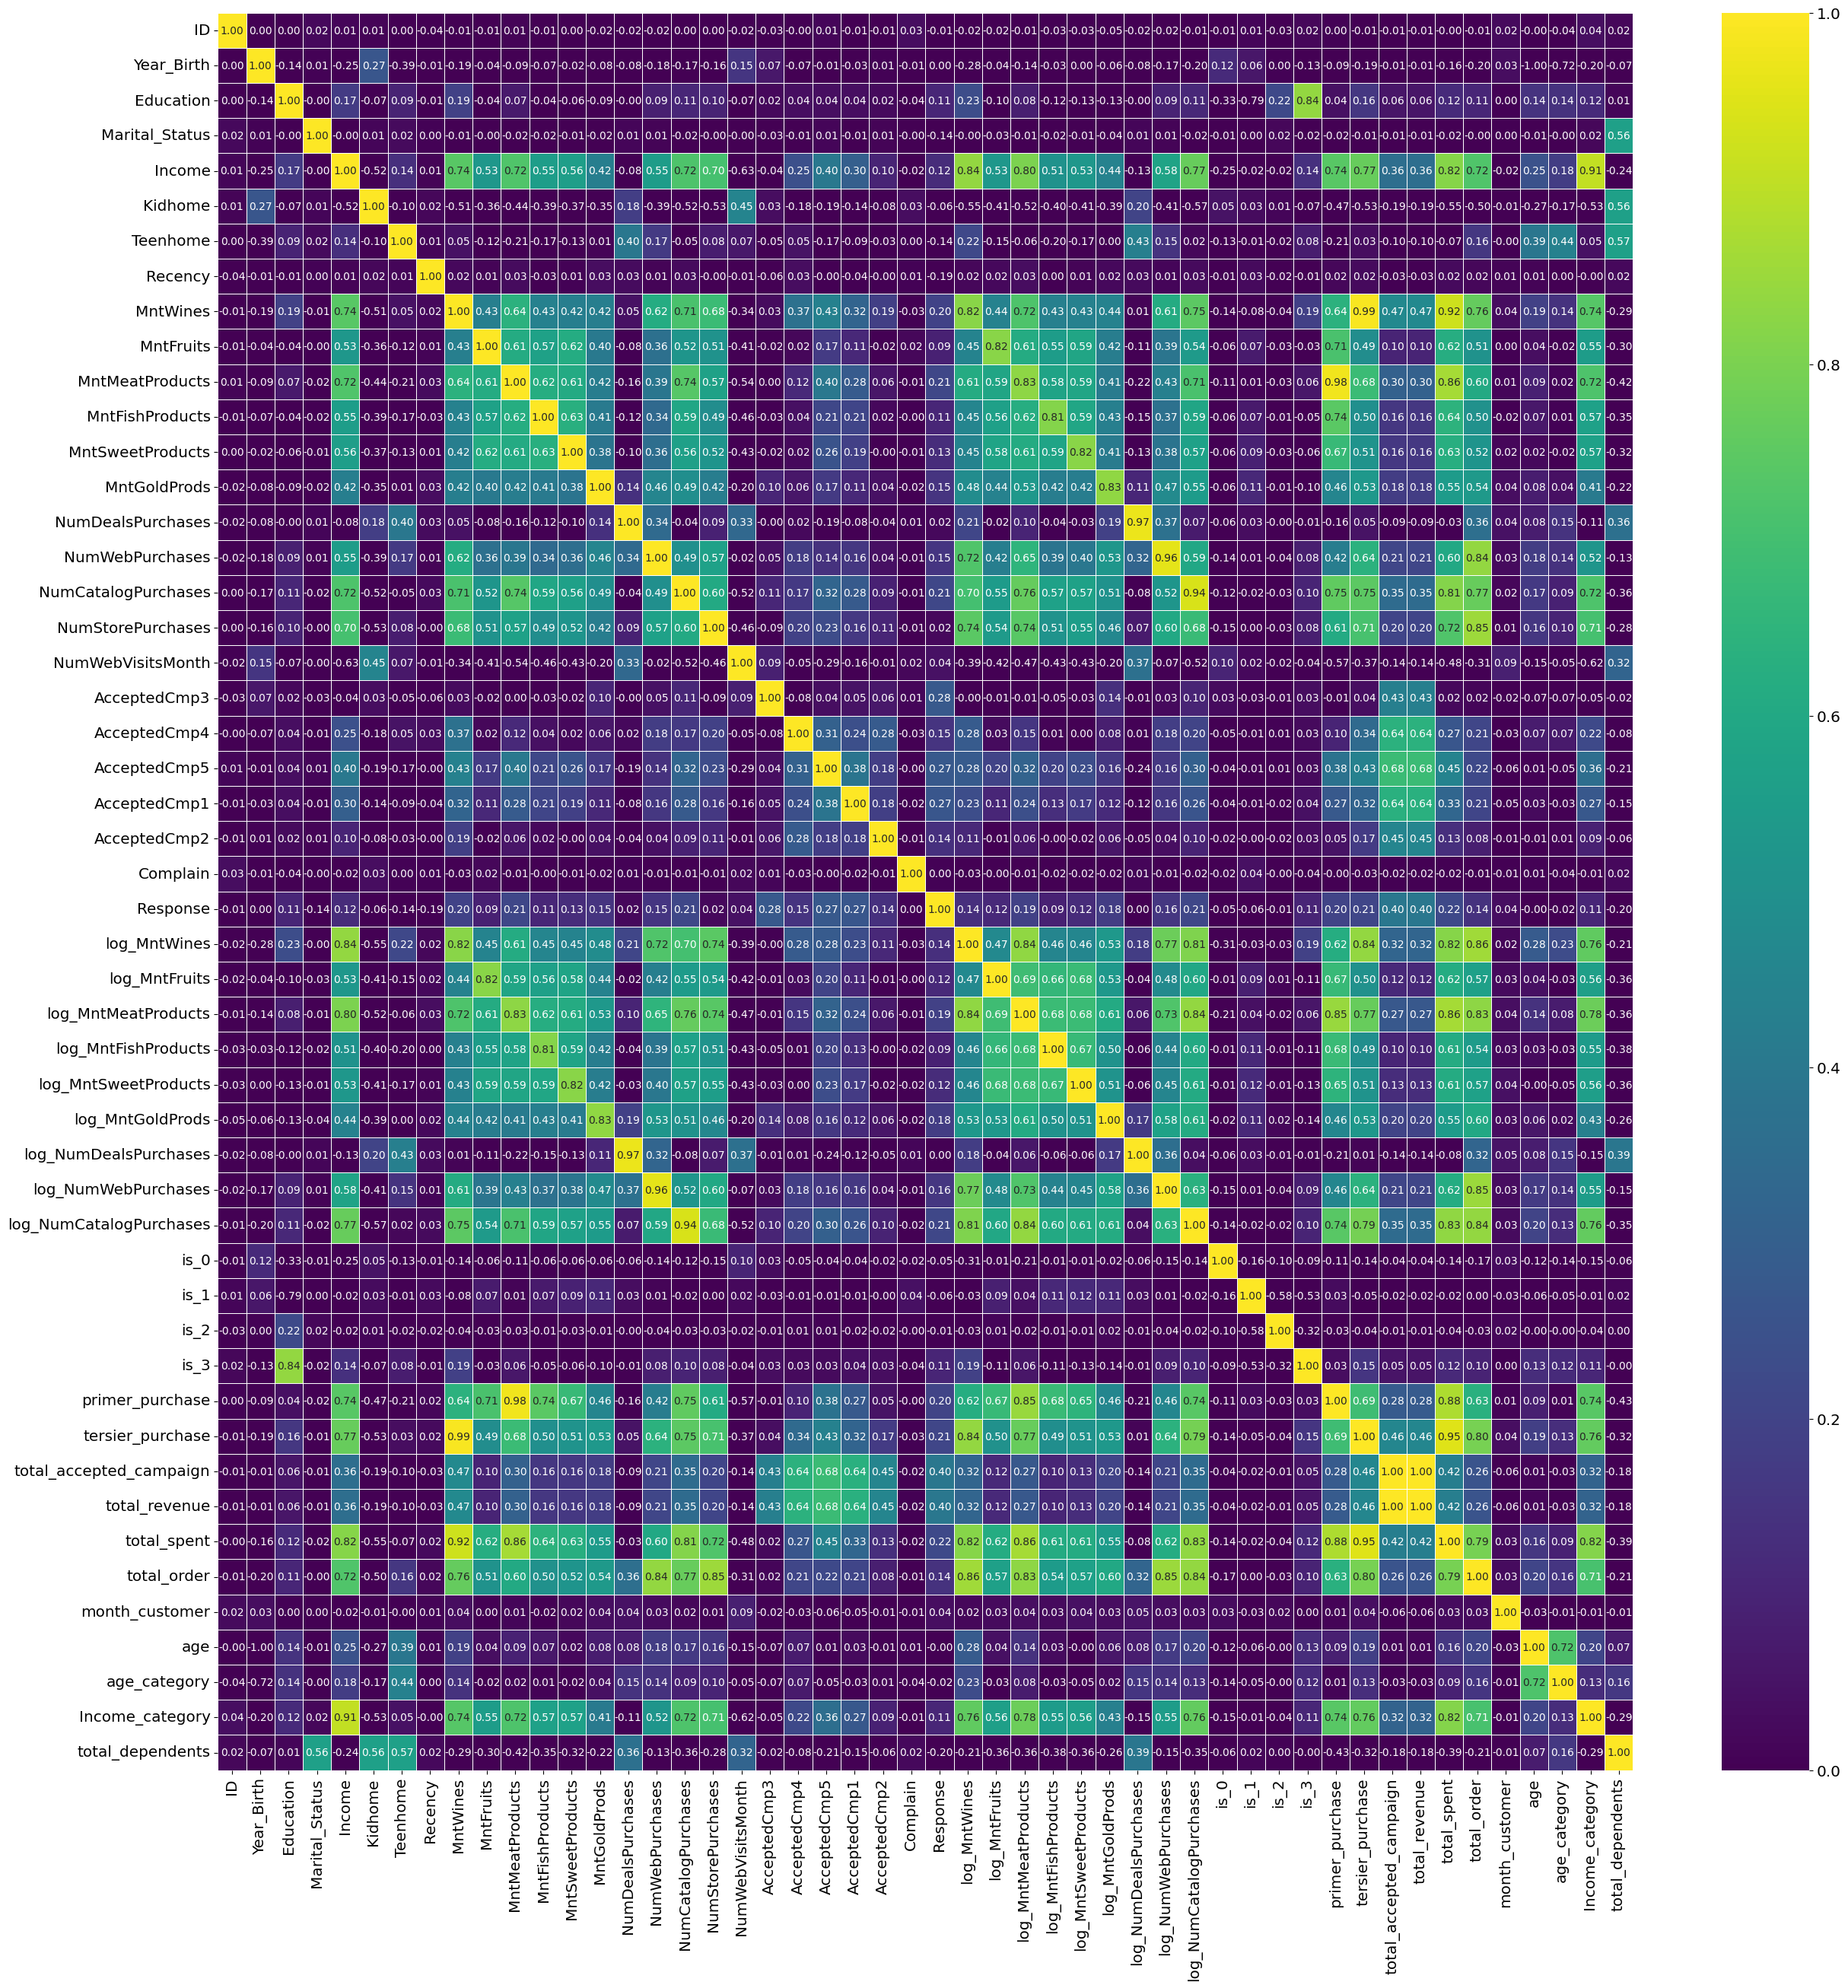

In [76]:
df_for_corr = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)

#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

In [77]:
df_for_corr = df.drop(['Dt_Customer','ID','Year_Birth','is_0','is_1','is_2','is_3','Kidhome','Teenhome', 
                        'NumDealsPurchases','NumWebPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                        'MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                        'Z_CostContact', 'Z_Revenue','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                       'log_MntFruits', 'log_MntFishProducts', 'log_MntSweetProducts','log_MntMeatProducts','log_MntWines','log_MntGoldProds',
                       'log_NumDealsPurchases','NumCatalogPurchases',
                       'primer_purchase', 'tersier_purchase', 'total_accepted_campaign', 'total_revenue',
                       'total_spent', 'total_order', 'Dt_Customer', 'month_customer', 'age_category', 'Income_category'], axis=1)

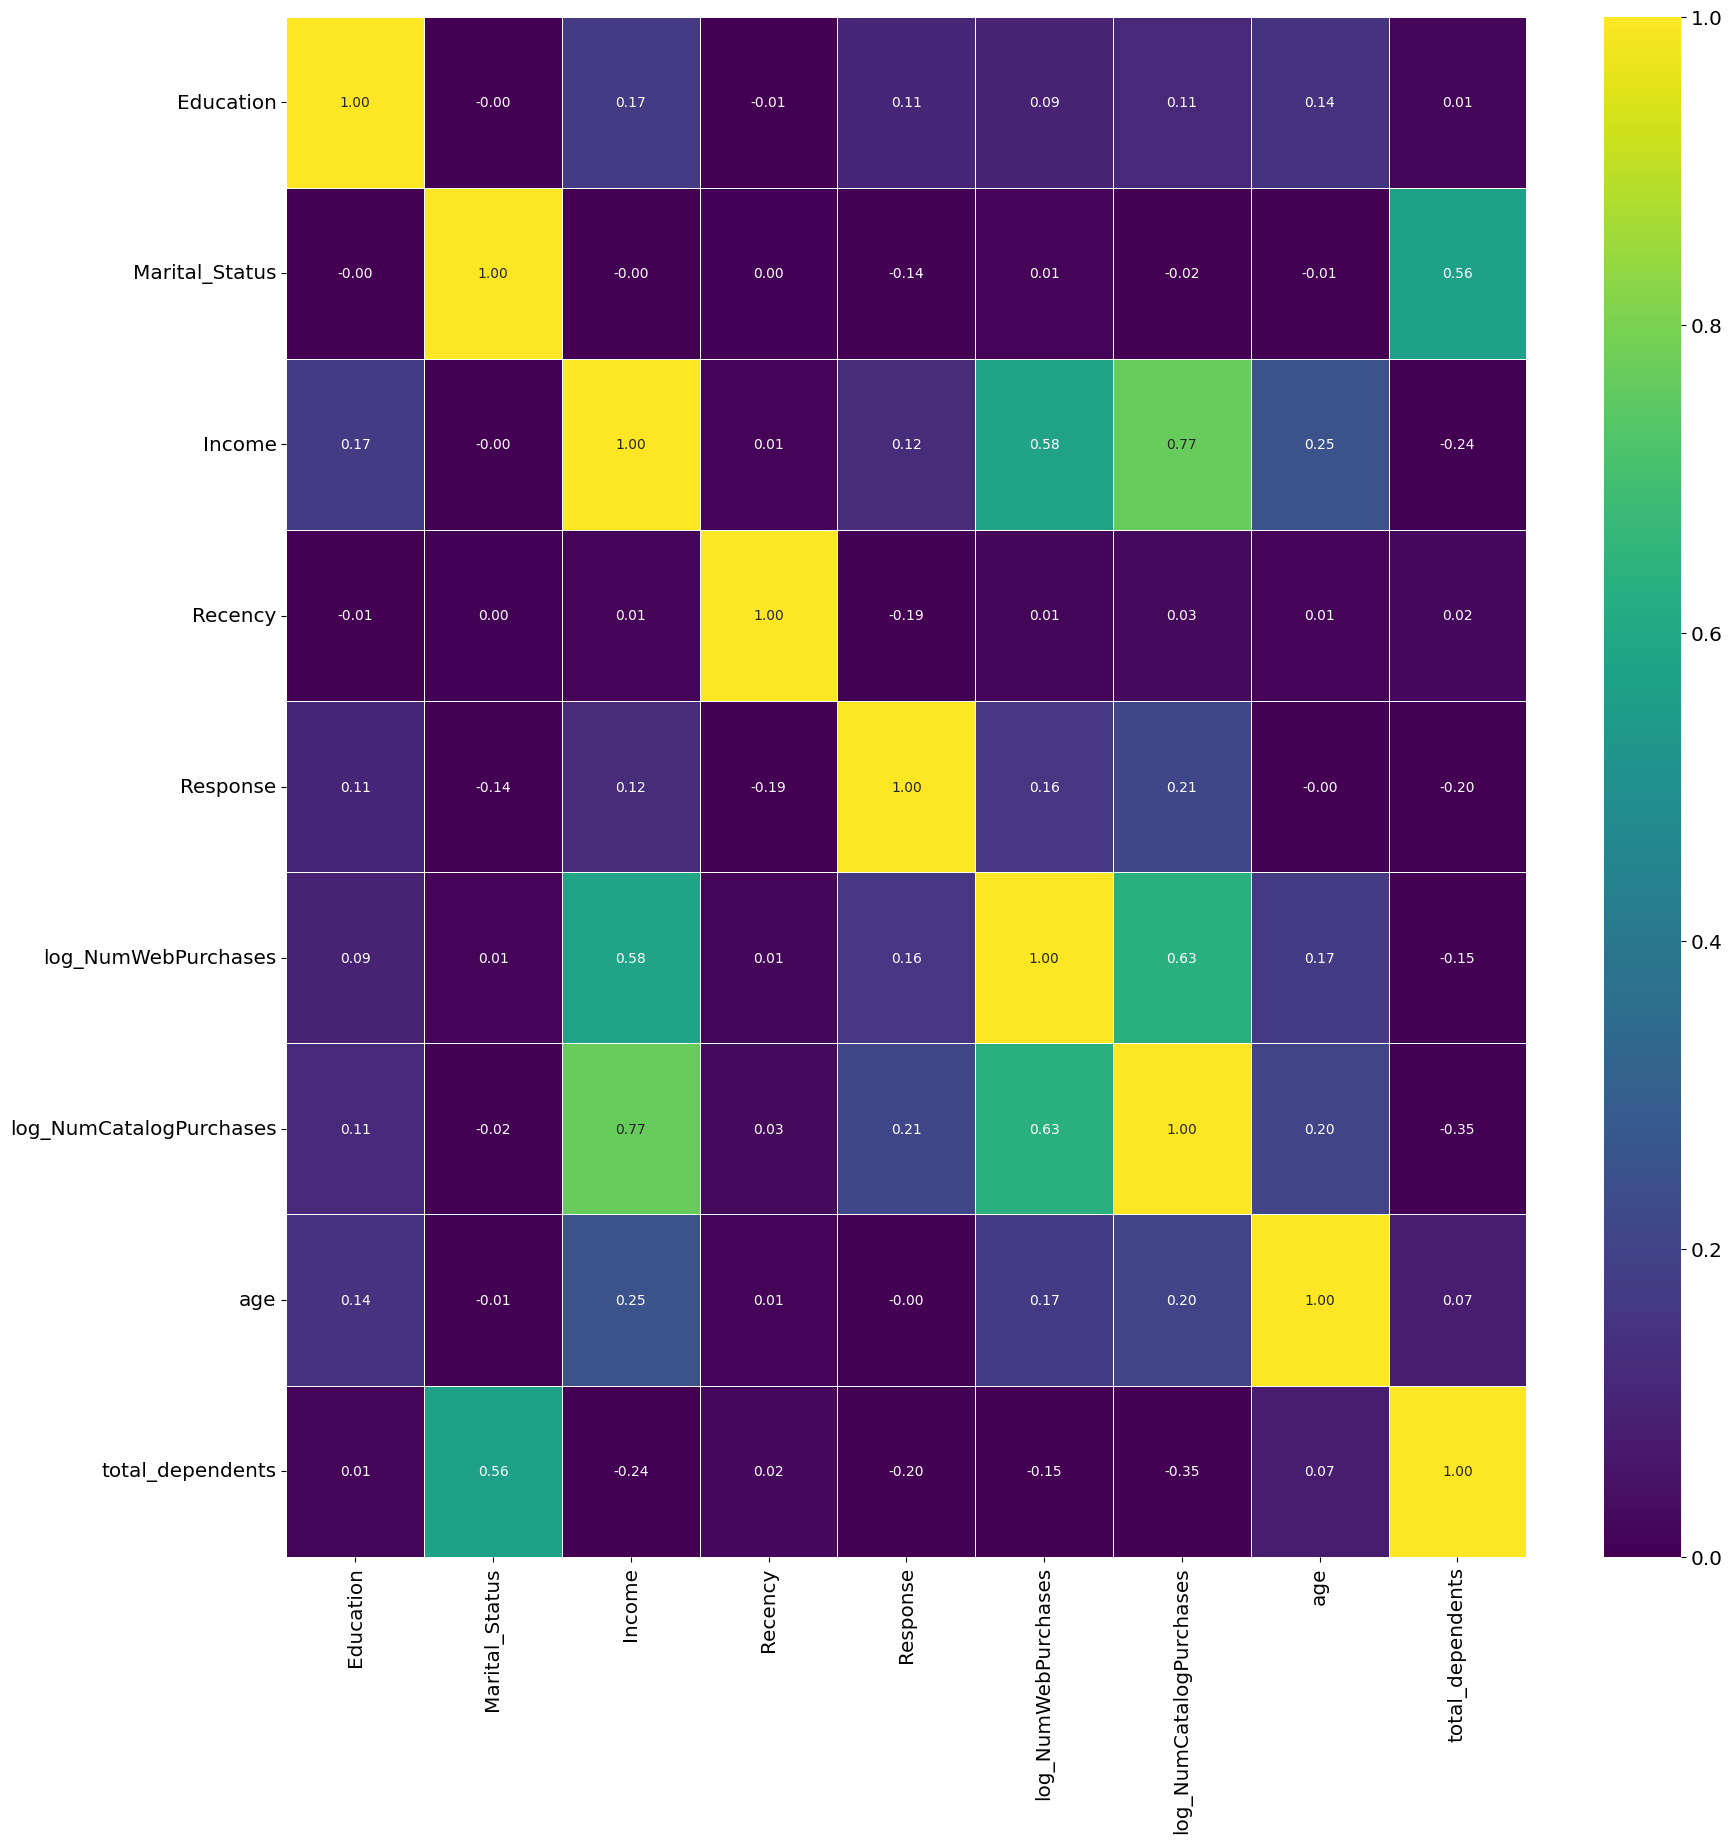

In [78]:


#heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df_for_corr.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show()

A partir de estos resultados de correlación se puedes escoger las variables que más influyen en la variable "Respuesta" y dejar fuera el resto. 

No vamos a hacer una selección de características rigurosa porque no se observan variables con una correlación fuerte con la variable objetivo y dejarñiamos un datset final con demasiadas pocas variables



---



---



# 7. Modelling and Evaluation

### 7.1. Data Preparation

In [79]:
X = df_for_corr.drop(['Response'], axis=1)
y = df_for_corr['Response']

In [80]:
df_for_corr['Response'].value_counts(normalize = True)

0    0.866359
1    0.133641
Name: Response, dtype: float64

In [81]:
X.describe()

Education  Marital_Status         Income      Recency  \
count  1953.000000     1953.000000    1953.000000  1953.000000   
mean      1.680492        0.650794   49183.513057    49.154634   
std       0.850092        0.476841   19583.157030    28.980502   
min       0.000000        0.000000    7500.000000     0.000000   
25%       1.000000        0.000000   33996.000000    24.000000   
50%       1.000000        1.000000   48006.000000    49.000000   
75%       2.000000        1.000000   64813.000000    74.000000   
max       3.000000        1.000000  101970.000000    99.000000   

       log_NumWebPurchases  log_NumCatalogPurchases          age  \
count          1953.000000              1953.000000  1953.000000   
mean              1.446477                 0.915257    54.019457   
std               0.552888                 0.741833    11.624047   
min               0.000000                 0.000000    27.000000   
25%               1.098612                 0.000000    46.000000   
50%               1.386294                 0.693147    53.000000   
75%               1.945910                 1.609438    63.000000   
max               2.484907                 2.484907    83.000000   

       total_dependents  
count       1953.000000  
mean           1.660522  
std            0.882992  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            2.000000  
max            4.000000

Hemos dividido los datos en dos tipos: datos de entrenamiento (70%) para entrenar al ML en el aprendizaje + datos de test (30%) para comprobar la precisión de nuestro ML.

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [85]:
y_train.describe()

count    1367.000000
mean        0.133870
std         0.340637
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64

In [86]:
y_test.describe()

count    586.000000
mean       0.133106
std        0.339979
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Response, dtype: float64

#### Class Imbalance

Los datos están desequilibrado, introducimos mejoras en él utilizando el método SMOTE para minimizar la brecha de desequilibrio de clases que se produce.

In [87]:
#use oversampling
from imblearn import under_sampling, over_sampling
X_train, y_train = over_sampling.SMOTE(sampling_strategy=0.5).fit_resample(X_train,y_train)

In [88]:
print(pd.Series(y_train).value_counts())

0    1184
1     592
Name: Response, dtype: int64


### 7.2. Data Modelling

Función que vamos a utilizar para evaluar el modelo

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    
# define function to see the feature importance for decision tree model 

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
# define function to see the best tuning hyperparameter 

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

#### 7.2.1. Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression # import logistic regression dari sklearn
logreg = LogisticRegression(random_state = 42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Train Set): 0.69
Accuracy (Test Set): 0.78
Precision (Train Set): 0.55
Precision (Test Set): 0.22
Recall (Train Set): 0.31
Recall (Test Set): 0.26
F1-Score (Train Set): 0.40
F1-Score (Test Set): 0.24
roc_auc (train-proba): 0.71
roc_auc (test-proba): 0.66
roc_auc (crossval train): 0.6696864792355899
roc_auc (crossval test): 0.6644126582241924


#### 7.2.2. K-Nearest Neighbor

In [129]:
# K-Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Train Set): 0.81
Accuracy (Test Set): 0.78
Precision (Train Set): 0.73
Precision (Test Set): 0.23
Recall (Train Set): 0.66
Recall (Test Set): 0.28
F1-Score (Train Set): 0.69
F1-Score (Test Set): 0.25
roc_auc (train-proba): 0.88
roc_auc (test-proba): 0.58
roc_auc (crossval train): 0.8774536678769476
roc_auc (crossval test): 0.6058626317241347


#### 7.2.3. Decision Tree

In [130]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.80
Precision (Train Set): 1.00
Precision (Test Set): 0.31
Recall (Train Set): 0.98
Recall (Test Set): 0.41
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.35
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.65
roc_auc (crossval train): 0.999787030566532
roc_auc (crossval test): 0.6587806375487514


#### 7.2.4. Random Forest

In [131]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.86
Precision (Train Set): 0.99
Precision (Test Set): 0.49
Recall (Train Set): 0.99
Recall (Test Set): 0.45
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.47
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.80
roc_auc (crossval train): 0.9996793815855634
roc_auc (crossval test): 0.7815417753440099


#### 7.2.5. Adaboost

In [95]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(random_state=42)
clf.fit(X_train, y_train)
eval_classification(clf)

Accuracy (Train Set): 0.85
Accuracy (Test Set): 0.83
Precision (Train Set): 0.80
Precision (Test Set): 0.38
Recall (Train Set): 0.71
Recall (Test Set): 0.42
F1-Score (Train Set): 0.75
F1-Score (Test Set): 0.40
roc_auc (train-proba): 0.92
roc_auc (test-proba): 0.77
roc_auc (crossval train): 0.8741519545882375
roc_auc (crossval test): 0.780745494907862


#### 7.2.6. XGBoost

In [132]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Train Set): 0.99
Precision (Test Set): 0.50
Recall (Train Set): 0.99
Recall (Test Set): 0.38
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.43
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.77
roc_auc (crossval train): 0.9997516484452363
roc_auc (crossval test): 0.7665067321495873


#### **Conclusión**
Los mejores valores de precisión y recall en el conjunto de datos de entrenamiento son generados por el Árbol de Decisión, el Bosque Aleatorio y XGBoost con cada valor obtenido de la siguiente manera:

* DT: 
  * Precisión 1.00
  * Recall 0.98
* RF:
  * Precisión 1.00
  * Recall 0.98
* XGBoost:
  * Precisión 0.89
  * Recall 0.83

### 7.3. Hyperparameter Tuning

Ajuste de hiperparámetros de los tres modelos que hemos seleccionado basándonos en los valores previos más altos de precisión y recuperación. 

Para ello, analizamos el resultado de la curva de aprendizaje, de modo que el resultado final del modelado de los tres tipos de métodos pueda proporcionar resultados más óptimos.

#### Decision Tree

In [133]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42) # inisiasi object dengan nama dt
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.80
Precision (Train Set): 1.00
Precision (Test Set): 0.31
Recall (Train Set): 0.98
Recall (Test Set): 0.41
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.35
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.65
roc_auc (crossval train): 0.999787030566532
roc_auc (crossval test): 0.6587806375487514


In [134]:
#default hyperparameter
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform 
import numpy as np 

#List of Hyperparameter 
max_depth = [int(x) for x in np.linspace(1, 110, num=30)]
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf, 
                       max_features=max_features, 
                       criterion=criterion, 
                       splitter=splitter)

#inisiasi model 
dt = DecisionTreeClassifier(random_state=42)
model= RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision')
model.fit(X_train, y_train)

#Predict & Evaluation 
y_pred = model.predict(X_test)
eval_classification(model)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.81
Precision (Train Set): 0.69
Precision (Test Set): 0.30
Recall (Train Set): 0.49
Recall (Test Set): 0.31
F1-Score (Train Set): 0.57
F1-Score (Test Set): 0.31
roc_auc (train-proba): 0.81
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.813547718668637
roc_auc (crossval test): 0.6851415572508535


params values: 95; train: 0.8424938082085465; test: 0.7369018776499092
params values: 96; train: 0.8424181941654494; test: 0.7363466585907531
params values: 97; train: 0.8423425801223522; test: 0.736069049061175
params values: 98; train: 0.8422669660792551; test: 0.736069049061175
params values: 99; train: 0.8421913520361579; test: 0.736069049061175
params values: 100; train: 0.8421157379930606; test: 0.7291792852816474
params values: 101; train: 0.841639940193572; test: 0.7346305269533615
params values: 102; train: 0.8415864396913806; test: 0.7346305269533615
params values: 103; train: 0.8415329391891893; test: 0.7346305269533615
params values: 104; train: 0.8407739453981008; test: 0.7350595598627094
params values: 105; train: 0.8409030599433892; test: 0.7338481728245507
params values: 106; train: 0.8388686141800583; test: 0.7362961841308298
params values: 107; train: 0.8388686141800583; test: 0.7362961841308298
params values: 108; train: 0.8388686141800583; test: 0.7362961841308298
p

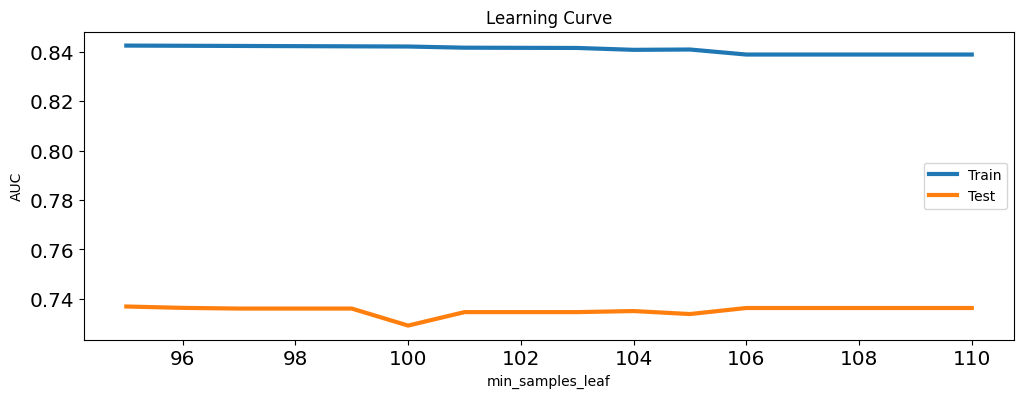

In [135]:
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curve(params_values): 
    train_scores = []
    test_scores = []

    for i in params_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf=i)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(i) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(params_values, train_scores, label='Train')
    plt.plot(params_values, test_scores, label='Test')
    plt.xlabel('min_samples_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

params_values = [int(x) for x in np.linspace(95, 110, 15)]
draw_learning_curve(params_values) 

Basándonos en el resultado de la curva de aprendizaje anterior, se puede ver que min_sample_leaf 98 muestra mejores resultados de comparación comparado con los otros, entonces se procede a buscar el siguiente mejor hiperparámetro.

params values: 1; train: 0.6195101351351351; test: 0.6351706036745406
params values: 2; train: 0.7234801577337473; test: 0.7123712901271957
params values: 3; train: 0.7796521183345508; test: 0.7472365233192005
params values: 4; train: 0.8099769163166545; test: 0.7696219462951746
params values: 5; train: 0.836257789673119; test: 0.7279678982434887
params values: 6; train: 0.8418539422023376; test: 0.7346305269533615
params values: 7; train: 0.8423425801223522; test: 0.736069049061175
params values: 8; train: 0.8423425801223522; test: 0.736069049061175
params values: 9; train: 0.8423425801223522; test: 0.736069049061175
params values: 10; train: 0.8423425801223522; test: 0.736069049061175


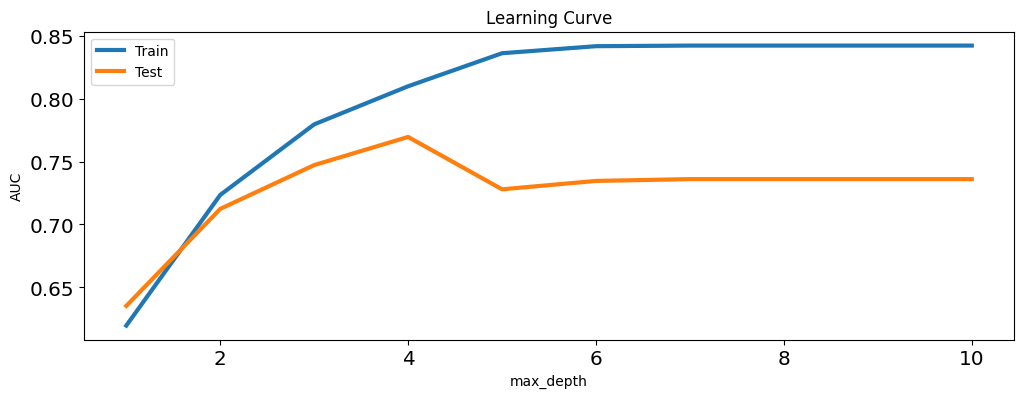

In [136]:
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curv(max_depths): 
    train_scores = []
    test_scores = []

    for c in max_depths: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=c)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('params values: ' + str(c) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(max_depths, train_scores, label='Train')
    plt.plot(max_depths, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

max_depths = [int(x) for x in np.linspace(1, 10, num=10)]
draw_learning_curv(max_depths)

Basándose en la curva de aprendizaje anterior, se puede ver que max_depth 2.5 muestra mejores resultados de comparación comparado con los otros, entonces se procede a buscar el siguiente mejor hiperparámetro.

param values: 2; train: 0.7234801577337473; test: 0.7123712901271957
param values: 2; train: 0.7234801577337473; test: 0.7123712901271957
param values: 3; train: 0.7234801577337473; test: 0.7123712901271957
param values: 4; train: 0.7234801577337473; test: 0.7123712901271957
param values: 5; train: 0.7234801577337473; test: 0.7123712901271957
param values: 6; train: 0.7234801577337473; test: 0.7123712901271957
param values: 7; train: 0.7234801577337473; test: 0.7123712901271957
param values: 8; train: 0.7234801577337473; test: 0.7123712901271957
param values: 9; train: 0.7234801577337473; test: 0.7123712901271957
param values: 10; train: 0.7234801577337473; test: 0.7123712901271957
param values: 11; train: 0.7234801577337473; test: 0.7123712901271957
param values: 12; train: 0.7234801577337473; test: 0.7123712901271957
param values: 13; train: 0.7234801577337473; test: 0.7123712901271957
param values: 14; train: 0.7234801577337473; test: 0.7123712901271957
param values: 15; train: 0.72

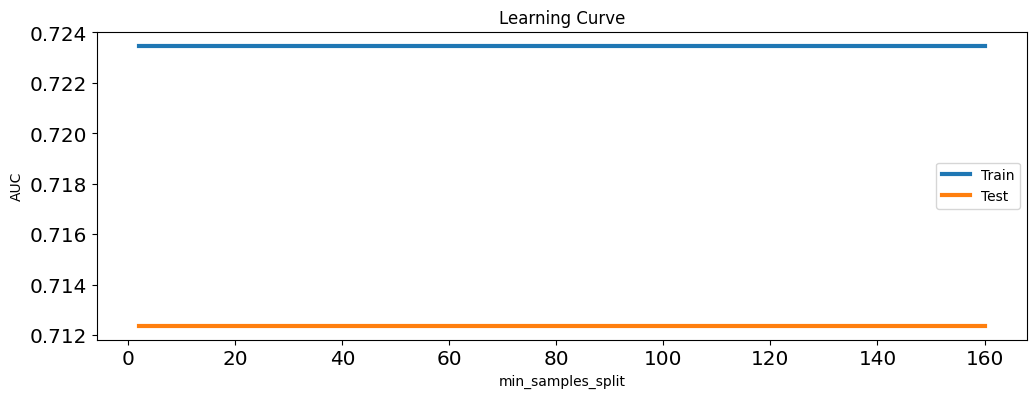

In [137]:
import numpy as np 
from matplotlib import pyplot as plt 


def draw_learning_curves(param_values): 
    train_scores = []
    test_scores = []

    for a in param_values: 
        model = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2, min_samples_split=a)
        model.fit(X_train, y_train)

        #Eval on Train 
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:, 1])
        train_scores.append(train_auc)

        #Eval on Test 
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
        test_scores.append(test_auc)

        print('param values: ' + str(a) + '; train: ' + str(train_auc) + '; test: ' + str(test_auc))
    
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 160, 160)]
draw_learning_curves(param_values) 

##### Tuning

Ya se han encontrado todos los hiperparámetros óptimos buscados, el siguiente paso es ejecutar de nuevo utilizando estos hiperparámetros óptimos para ver los cambios en la salida producida por este modelo de Árbol de Decisión.

In [102]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt = DecisionTreeClassifier(random_state = 42, min_samples_leaf = 97, max_depth=2, min_samples_split=80, splitter = 'best', criterion = 'gini') 
# secara default criterion = gini, splitter = best, max_features = none
dt.fit(X_train, y_train) # fit model decision tree dari data train
eval_classification(dt)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.87
Precision (Train Set): 0.86
Precision (Test Set): 0.52
Recall (Train Set): 0.21
Recall (Test Set): 0.15
F1-Score (Train Set): 0.34
F1-Score (Test Set): 0.24
roc_auc (train-proba): 0.72
roc_auc (test-proba): 0.71
roc_auc (crossval train): 0.6842232615113212
roc_auc (crossval test): 0.6492099588764603


#### **Random Forest**

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.86
Precision (Train Set): 0.99
Precision (Test Set): 0.49
Recall (Train Set): 0.99
Recall (Test Set): 0.45
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.47
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.80
roc_auc (crossval train): 0.9996793815855634
roc_auc (crossval test): 0.7815417753440099


param value: 1; train: 0.9283121804236669; test: 0.675600646073087
param value: 23; train: 0.9998345051132213; test: 0.8028719967696346
param value: 45; train: 0.9998773055149743; test: 0.803465071673733
param value: 67; train: 0.9998944256756757; test: 0.804234807187563
param value: 89; train: 0.9999079791362309; test: 0.8030108015344235
param value: 111; train: 0.9999072657962016; test: 0.7995533010296791
param value: 133; train: 0.9999044124360846; test: 0.8039193418130426
param value: 155; train: 0.99990869247626; test: 0.8040707651928125
param value: 177; train: 0.9999072657962016; test: 0.805294770845952
param value: 200; train: 0.9999044124360847; test: 0.8059004643650314


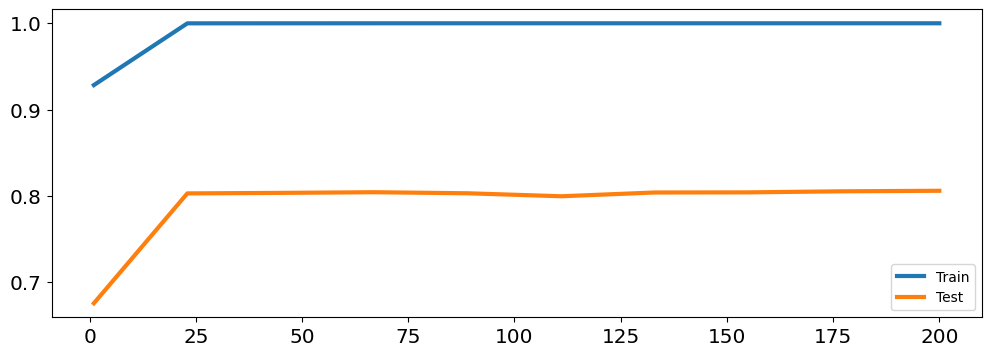

In [139]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 200, 10)] # n_estimators

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators=c) #cek param n estimator
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

n_estimator = 23 muestra el mejor resultado

param value: 2; train: 0.8229347379474069; test: 0.800323036543509
param value: 4; train: 0.8840387315102264; test: 0.8146199273167776
param value: 6; train: 0.9375535005021914; test: 0.8085882293559458
param value: 8; train: 0.9780933277027026; test: 0.8069225721784776
param value: 10; train: 0.9945572155770634; test: 0.804386230567333
param value: 12; train: 0.9991568320854638; test: 0.793673026448617
param value: 14; train: 0.9997246507487217; test: 0.8078689683020392
param value: 16; train: 0.9998387851533965; test: 0.8021653543307087
param value: 18; train: 0.9998245183528123; test: 0.8107586311326469
param value: 20; train: 0.9998373584733382; test: 0.803894104583081


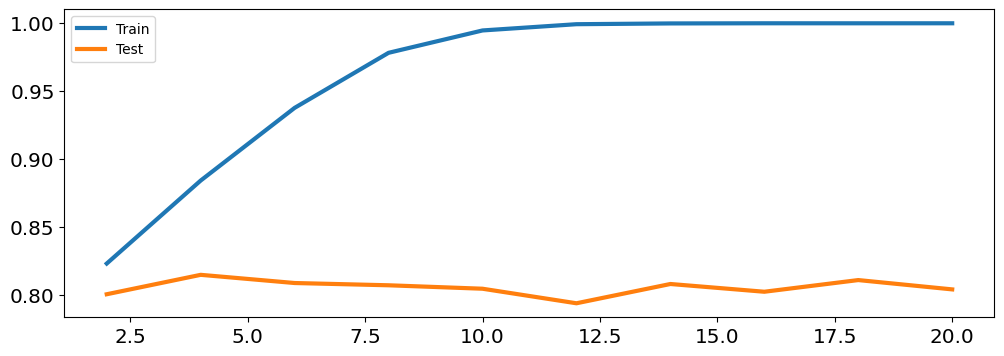

In [140]:
#learning curve
param_values = [int(x) for x in np.linspace(2, 20, 10)] # max_depth

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = c) # cek param max_depth
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

max_depth=2 muestra el mejor resultado

param value: 2; train: 0.8229347379474069; test: 0.800323036543509
param value: 3; train: 0.8229347379474069; test: 0.800323036543509
param value: 4; train: 0.8229347379474069; test: 0.800323036543509
param value: 5; train: 0.8229347379474069; test: 0.800323036543509
param value: 7; train: 0.8229347379474069; test: 0.800323036543509
param value: 8; train: 0.8229347379474069; test: 0.800323036543509
param value: 9; train: 0.8229347379474069; test: 0.800323036543509
param value: 11; train: 0.8229347379474069; test: 0.800323036543509
param value: 12; train: 0.8229347379474069; test: 0.800323036543509
param value: 13; train: 0.8229347379474069; test: 0.800323036543509
param value: 14; train: 0.8229347379474069; test: 0.800323036543509
param value: 16; train: 0.8229347379474069; test: 0.800323036543509
param value: 17; train: 0.8229347379474069; test: 0.800323036543509
param value: 18; train: 0.8229347379474069; test: 0.800323036543509
param value: 20; train: 0.8229347379474069; test: 0.800

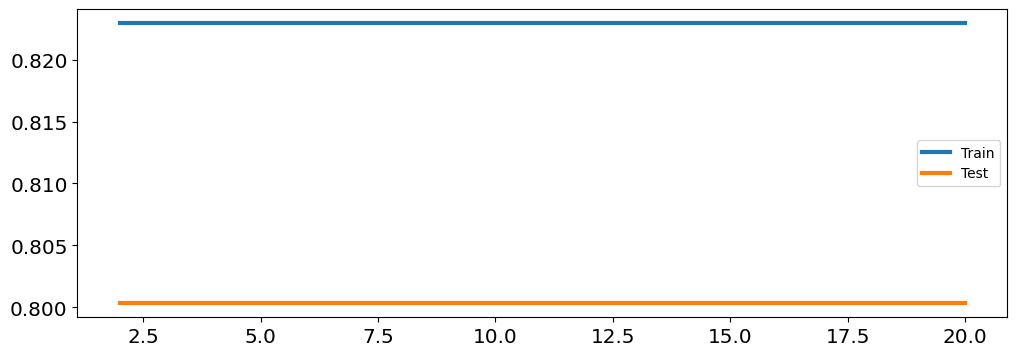

In [141]:
#learning curve
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_split

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = c) # cek param min_sample_split
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

param value: 2; train: 0.8229347379474069; test: 0.800323036543509
param value: 3; train: 0.8227692430606283; test: 0.8007773066828185
param value: 4; train: 0.8227692430606283; test: 0.8007773066828185
param value: 5; train: 0.8227692430606283; test: 0.8007773066828185
param value: 7; train: 0.8227692430606283; test: 0.8007773066828185
param value: 8; train: 0.8227692430606283; test: 0.8007773066828185
param value: 9; train: 0.8224960338294376; test: 0.8009287300625882
param value: 11; train: 0.8224960338294376; test: 0.8009287300625882
param value: 12; train: 0.8224960338294376; test: 0.8009287300625882
param value: 13; train: 0.822396166225347; test: 0.8008277811427418
param value: 14; train: 0.822396166225347; test: 0.8008277811427418
param value: 16; train: 0.822396166225347; test: 0.8008277811427418
param value: 17; train: 0.822396166225347; test: 0.8008277811427418
param value: 18; train: 0.82248462038897; test: 0.8006637391479912
param value: 20; train: 0.82248462038897; test: 

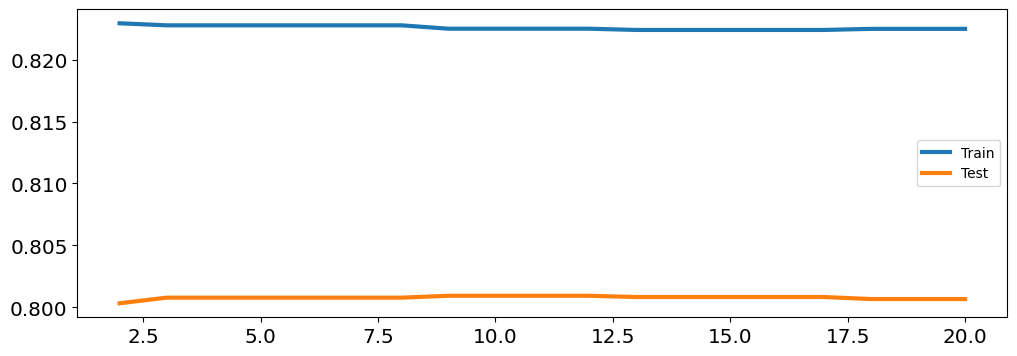

In [142]:
#learning curve
param_values = [int(x) for x in np.linspace(2, 20, 15)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(random_state=42, n_estimators= 23, max_depth = 2, min_samples_split = 11, min_samples_leaf = c) # cek param min_sample_leaf
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

La curva es estable. El valor no afecta

##### **Tuning**

In [143]:
# tuning hyperparameter RF
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.88
Precision (Train Set): 0.82
Precision (Test Set): 0.56
Recall (Train Set): 0.31
Recall (Test Set): 0.31
F1-Score (Train Set): 0.45
F1-Score (Test Set): 0.40
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80
roc_auc (crossval train): 0.7818080856570753
roc_auc (crossval test): 0.7582367970470518


#### XGBoost

In [109]:
# XGBoost

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
eval_classification(xg)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.87
Precision (Train Set): 0.99
Precision (Test Set): 0.50
Recall (Train Set): 0.99
Recall (Test Set): 0.38
F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.43
roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.77
roc_auc (crossval train): 0.9997516484452363
roc_auc (crossval test): 0.7665067321495873


param value: 1; train: 0.8983376323959096; test: 0.7986069049061175
param value: 2; train: 0.9701360196767712; test: 0.8002977993135474
param value: 3; train: 0.9914741599707816; test: 0.7874520492630729
param value: 4; train: 0.9986289604638422; test: 0.7797042196648495
param value: 5; train: 0.9998416385135135; test: 0.7876034726428427
param value: 6; train: 0.999911545836377; test: 0.7678174843529173
param value: 7; train: 0.9999129725164353; test: 0.7670603674540681
param value: 8; train: 0.9999129725164353; test: 0.7730415909549768
param value: 9; train: 0.9999129725164353; test: 0.7736977589339795
param value: 10; train: 0.9999129725164353; test: 0.780587522713507


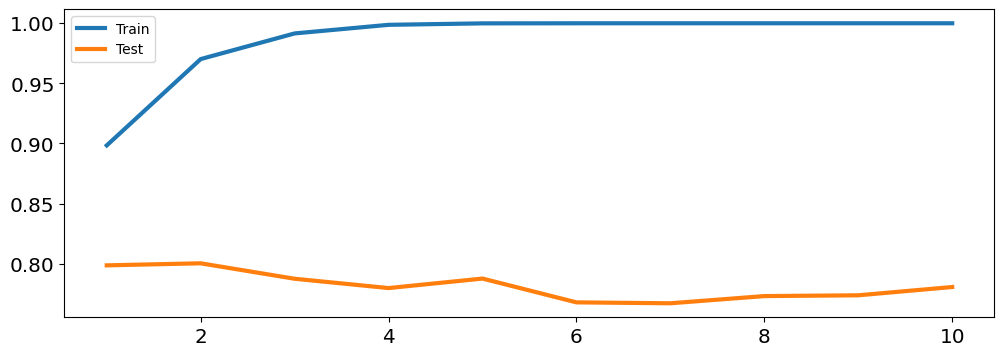

In [144]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 10, 10)]

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

max_depth = 1

param value: 0.0; train: 0.8983376323959096; test: 0.7986069049061175
param value: 11.11111111111111; train: 0.8726916316654493; test: 0.7966131637391479
param value: 22.22222222222222; train: 0.8504076024926954; test: 0.7878053704825357
param value: 33.33333333333333; train: 0.8360787413257853; test: 0.7887517666060974
param value: 44.44444444444444; train: 0.82497631711103; test: 0.7913133454472037
param value: 55.55555555555556; train: 0.8219795756482834; test: 0.78694730466384
param value: 66.66666666666666; train: 0.8219795756482834; test: 0.78694730466384
param value: 77.77777777777777; train: 0.8111924477264427; test: 0.7788587724611347
param value: 88.88888888888889; train: 0.8030860516344047; test: 0.7865687462144155
param value: 100.0; train: 0.8051476043188459; test: 0.7871996769634565


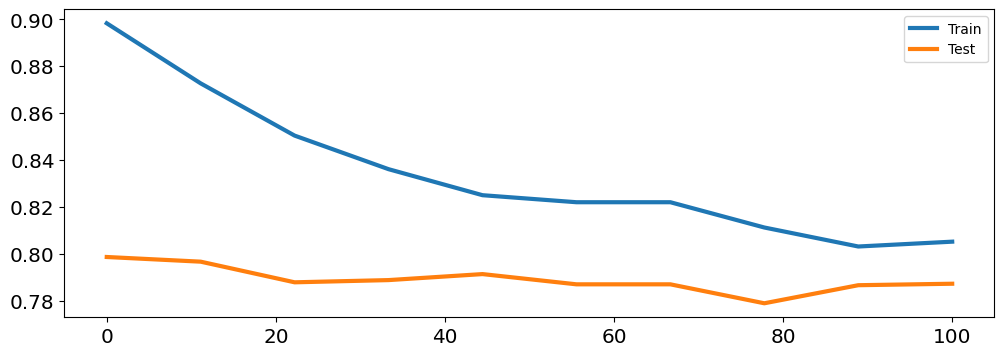

In [145]:
#learning curve
param_values= [float(x) for x in np.linspace(0, 100, num = 10)]

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

gamma = 66.66 

param value: auto; train: 0.8219795756482834; test: 0.78694730466384
param value: exact; train: 0.8219795756482834; test: 0.78694730466384
param value: approx; train: 0.8217876871804237; test: 0.78694730466384
param value: hist; train: 0.8183386881391526; test: 0.78694730466384


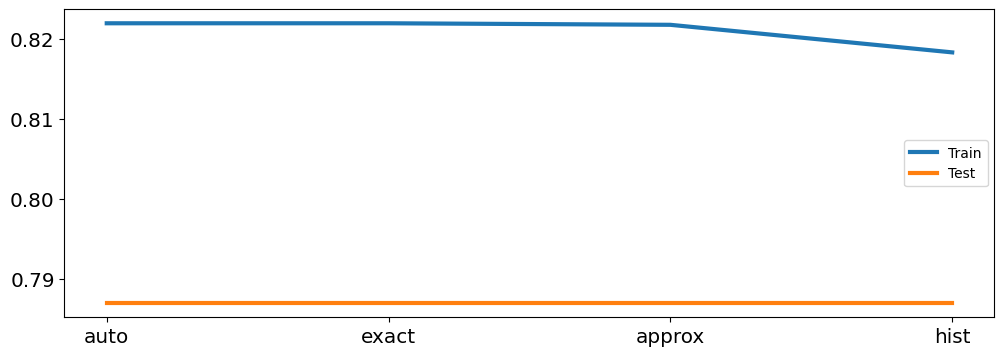

In [146]:
#learning curve
param_values=['auto', 'exact', 'approx', 'hist']

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

Based on the output of the learning curve above, it can be seen that the auto and exact tree_methods show better comparison results than the others, so we choose auto which incidentally is the default parameter. Then proceed to the search for the next best hyperparameter.

param value: 1; train: 0.8219795756482834; test: 0.78694730466384
param value: 3; train: 0.8219795756482834; test: 0.78694730466384
param value: 5; train: 0.8219795756482834; test: 0.78694730466384
param value: 7; train: 0.8219795756482834; test: 0.78694730466384
param value: 9; train: 0.8219795756482834; test: 0.78694730466384
param value: 11; train: 0.8219795756482834; test: 0.78694730466384
param value: 13; train: 0.8219795756482834; test: 0.78694730466384
param value: 15; train: 0.8219795756482834; test: 0.78694730466384
param value: 17; train: 0.8219795756482834; test: 0.78694730466384
param value: 20; train: 0.8219795756482834; test: 0.78694730466384


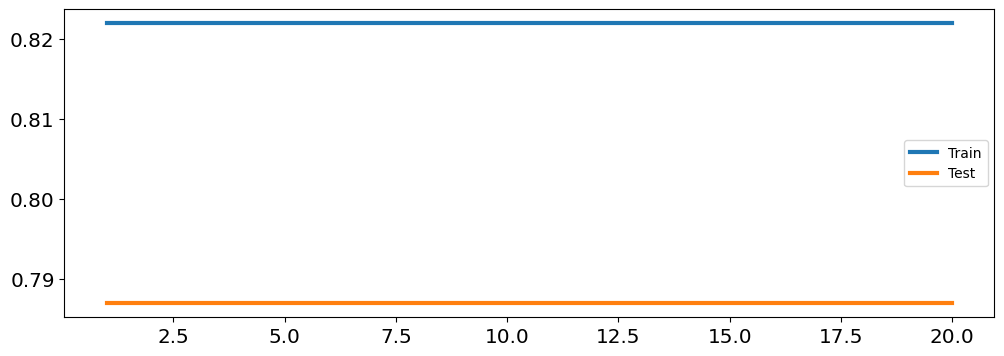

In [147]:
#learning curve
param_values= [int(x) for x in np.linspace(1, 20, num = 10)]

train_scores = []
test_scores = []

for c in param_values:
    model = XGBClassifier(max_depth=1, gamma=66.66, tree_method='auto', min_child_weight=c, random_state=42) 
    model.fit(X_train, y_train)

    # eval on train
    y_pred_train_proba = model.predict_proba(X_train)
    train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(X_test)
    test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

el parámetro no afecta

##### **Tuning**

In [148]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [1],
                    'gamma' : [66.66],
                    'tree_method' : ['auto'],
                    'min_child_weight' : [11],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 5)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 5)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 5)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv= 7, random_state=42, scoring='precision', n_iter=20)
xg_tuned.fit(X_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned.best_estimator_)

Accuracy (Train Set): 0.74
Accuracy (Test Set): 0.88
Precision (Train Set): 0.90
Precision (Test Set): 0.65
Recall (Train Set): 0.26
Recall (Test Set): 0.22
F1-Score (Train Set): 0.40
F1-Score (Test Set): 0.33
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.79
roc_auc (crossval train): 0.5841579672974246
roc_auc (crossval test): 0.5623400708662791


### 7.4. Model Selection

**Random Forest**

In [150]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [23]
criterion = ['gini', 'entropy']
max_depth = [2]
min_samples_split = [11]
min_samples_leaf = [11]

hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rfs = RandomForestClassifier(random_state=42)
rss = RandomizedSearchCV(rfs, hyperparameters, scoring='precision', random_state=42, cv=5)
rss.fit(X_train, y_train)
eval_classification(rss)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.88
Precision (Train Set): 0.82
Precision (Test Set): 0.56
Recall (Train Set): 0.31
Recall (Test Set): 0.31
F1-Score (Train Set): 0.45
F1-Score (Test Set): 0.40
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80
roc_auc (crossval train): 0.7818080856570753
roc_auc (crossval test): 0.7582367970470518


### 7.5. Feature Importance

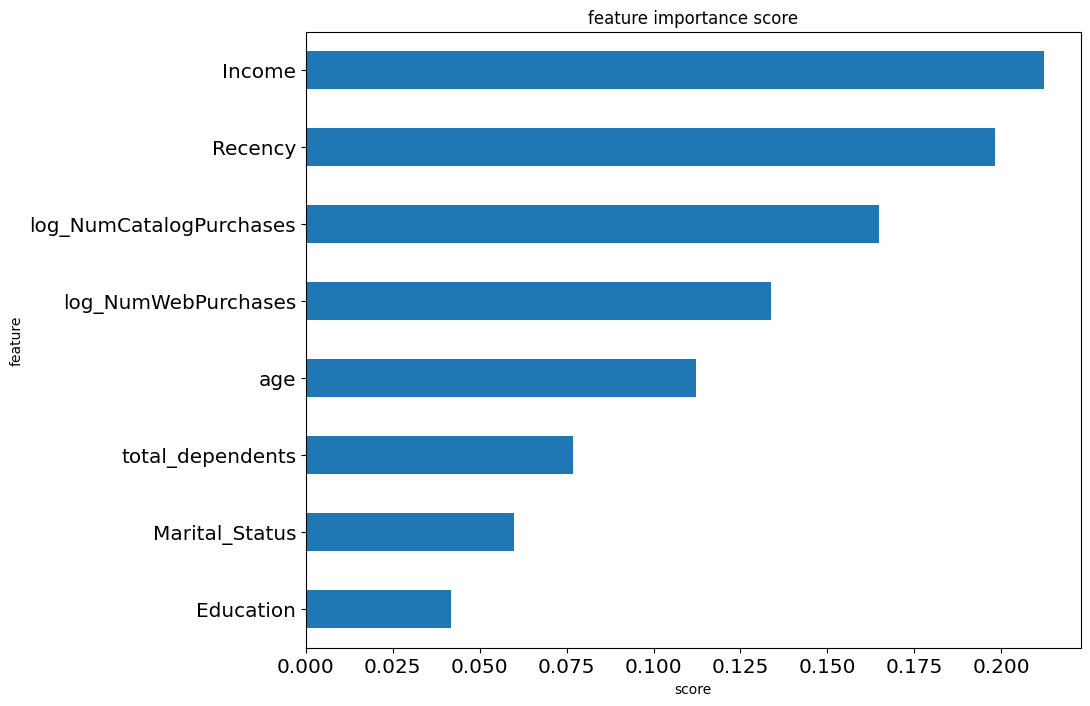

In [116]:
show_feature_importance(rf)

# 8. Información relevante y recomendaciones

Basándonos en los resultados de la anterior visualización de la importancia de las características, las siguientes son las ideas y recomendaciones de negocio que podemos concluir basándonos en las 3 características principales utilizando el modelo Random Forest.

#### Información I (Salario)

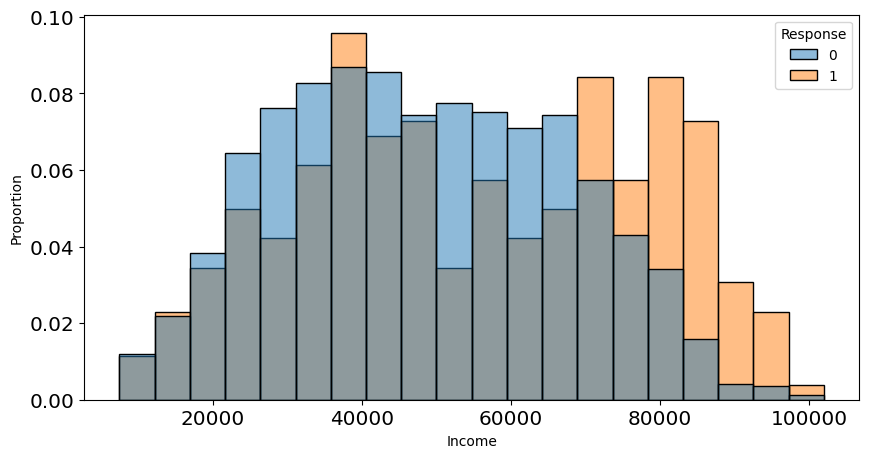

In [151]:
# Income
plt.figure(figsize = (10,5))
sns.histplot(x='Income', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

1. Información sobre el salario


Cuanto mayores son los ingresos del cliente, más probable es que éste responda a la campaña dada. Esto se desprende de la cantidad de ingresos de los clientes, a partir de 70.000 y más, que tienden a responder a las campañas dadas.

2. Recomendación


Cuanto mayor es la renta del cliente, más probable es que responda. Así que en el futuro la empresa puede centrarse en campañas para clientes con ingresos superiores a 70.000 para aumentar la respuesta. Además, para aumentar el tráfico de clientes con ingresos superiores a 70.000, la empresa puede implantar un sistema especial de puntos para los clientes que utilicen tarjetas de débito/crédito oro y platino, que los clientes podrán canjear por atractivos premios en forma de descuentos o entrega gratuita de productos.

#### Información II (Recency)

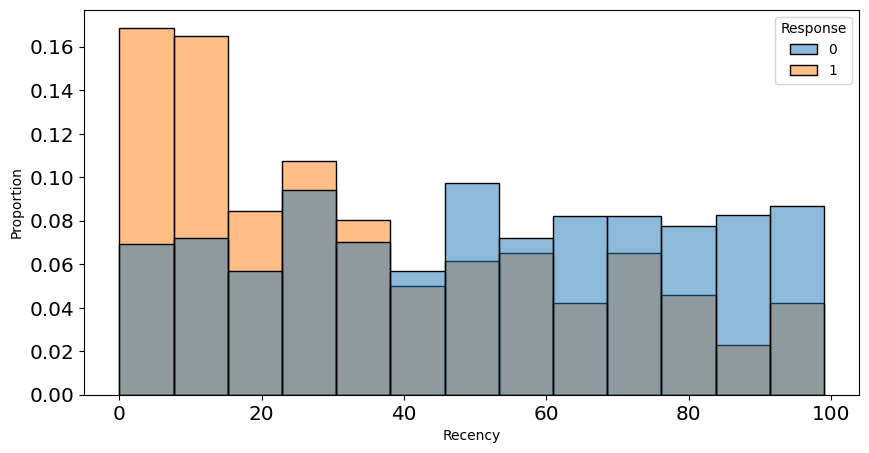

In [152]:
# recency
plt.figure(figsize = (10,5))
sns.histplot(x='Recency', hue = 'Response', data = df_for_corr, stat = 'proportion', common_norm = False)
plt.show()

In [153]:
category_recency=[]
for i in df_for_corr['Recency']:
  if i <= 7  : 
    category_recency.append("<= seminggu")
  elif i <= 14 : 
    category_recency.append("<= 14 hari")
  elif i <= 30 : 
    category_recency.append("<= sebulan")
  elif i <= 60 : 
    category_recency.append("<= 2 bulan")
  else : 
    category_recency.append("> 2 bulan")
df_for_corr['category_recency'] = category_recency

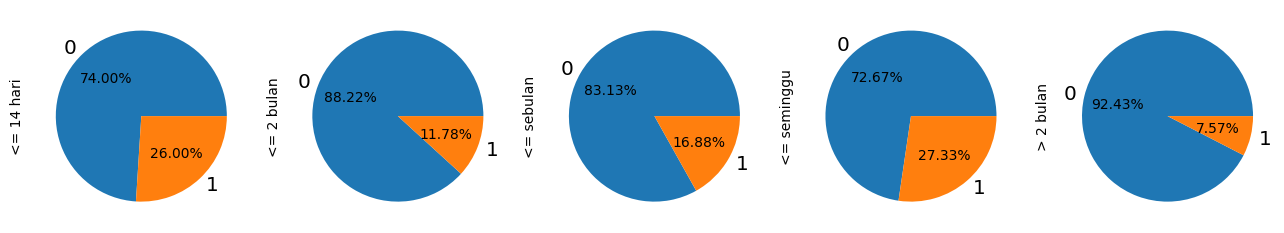

In [154]:
pd.crosstab(index=df_for_corr['Response'], columns=df_for_corr['category_recency']).plot(kind="pie", figsize=(16, 8), subplots=True, autopct='%1.2f%%', legend=False)
plt.show()

1. Información


Según el histograma y el diagrama de sectores anteriores, cuanto menor es la frecuencia o más cercana es la última compra del cliente, más probable es que responda a la próxima campaña.

2. Recomendación

Conociendo los insights que se han descrito en el punto 1, en el futuro la empresa podrá ofrecer campañas especiales a los clientes que tengan criterios de compra o que realicen la última compra en el momento más cercano a la campaña que se vaya a implementar. Además, en el futuro las empresas también deberán preocuparse más por llegar a los clientes que llevan mucho tiempo sin comprar o que nunca han comprado, ofreciéndoles promos especiales, que pueden ser en forma de vales de descuento para nuevos usuarios, vales de descuento para antiguos usuarios, etc. Además, las empresas también pueden ofrecer promociones directas que se lleven a cabo mensualmente (como 2.2, 3.3, etc.) para mantener el tráfico de clientes creando un hábito de "compra mensual". Y, por último, las empresas también pueden instalar vallas publicitarias electrónicas u otros anuncios cuyo objetivo general sea atraer la atención de nuevos usuarios.

# 8. Simulación

##### **Métricas de Negocio**

In [155]:
# Model Evaluation: Random Forest
eval_classification(rss)

Accuracy (Train Set): 0.75
Accuracy (Test Set): 0.88
Precision (Train Set): 0.82
Precision (Test Set): 0.56
Recall (Train Set): 0.31
Recall (Test Set): 0.31
F1-Score (Train Set): 0.45
F1-Score (Test Set): 0.40
roc_auc (train-proba): 0.82
roc_auc (test-proba): 0.80
roc_auc (crossval train): 0.7818080856570753
roc_auc (crossval test): 0.7582367970470518


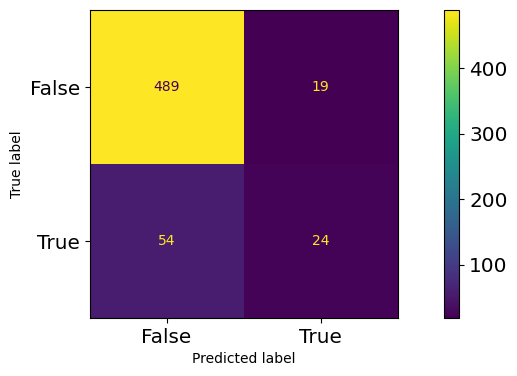

In [156]:
#Confusion metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix # import package dari sklearn

y_pred = rss.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)#, normalize='all')

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [157]:
TP = confusion_matrix[1][1]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TN = confusion_matrix[0][0]

TP + FP + TN + FN

586

### 8.1. Tasa de respuesta

In [158]:
# response_rate is derived from predicted data = 1 (True) 
response_rate = (25/ (25+21)) # same as precision
response_rate

0.5434782608695652

Aplicando el modelo de Random Forest, la empresa pudo aumentar la tasa de respuesta de sólo el 13,3% anterior al 54,3%.

### 8.2. Tasa de beneficio

In [160]:
# before model
total_respon = df_for_corr['Response'].value_counts()[1]
revenue = 11
cost = 3
total_campaign = len(df_for_corr) # total campaign for all customers
total_cost = total_campaign * cost
total_revenue = total_respon * revenue
total_profit = total_revenue - total_cost

# revenue_rate_before
revenue_rate_before = (total_profit/ total_revenue) *100
revenue_rate_before

-104.07523510971788

In [161]:
# after model
revenue = 11
cost = 3
total_campaign = TP + FP
total_cost = total_campaign * cost
total_revenue = TP * revenue
total_profit = total_revenue - total_cost

# calculate revenue_rate
revenue_rate_after = (total_profit/ total_revenue) *100
revenue_rate_after

51.13636363636363

Aplicando el modelo de Random Forest la compañía aumenta sus beneficios netos de una pérdida de -104.1% a un beneficio del 52.8%.



---



---

